In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import pickle

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
train_data  = pd.read_csv("ml_case_training_data.csv")
churn_data  = pd.read_csv("ml_case_training_output.csv")
history_data = pd.read_csv("ml_case_training_hist_data.csv")

In [5]:
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [6]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [7]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
#combining two data frames
train = pd.merge(train_data,churn_data,on="id")

In [9]:
train.tail()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,2009-12-18,2015-12-21,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [10]:
pd.DataFrame({"Data Types":train.dtypes})

,Data Types
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [11]:
pd.DataFrame({"Data Type":history_data.dtypes})

,Data Type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


In [12]:
#dataframe stats
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


1. Data is coruppted minimumm of forecast is negative not possible
2. campagin_disc_ele is empty column.
3. data is highly skewed when we look at percentile

In [13]:
train["campaign_disc_ele"].isnull().values.all()

True

In [14]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [15]:
#getting percantage of missing values for every column
pd.DataFrame({"Missing Values": train.isnull().sum()/len(train.index)*100})

,Missing Values
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


Columns with missing values more thqan 75 % needed to remove

In [16]:
pd.DataFrame({"Missing Values":history_data.isnull().sum()/len(history_data.index)*100})

,Missing Values
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


Since the missing values are very less we can replace them with 0 or mean or appropriate values

# Churn

In [17]:
churn = train[["id","churn"]]

In [18]:
churn.columns = ["Companies","churn"] # renaming columns for the visulization purposes

In [19]:
def plot_stacked_bars (dataframe , title_,size_=(18,10),rot_=0,legend_="upper right"):
    ax = dataframe.plot(kind="bar",
                       stacked = True,
                       figsize = size_,
                       rot = rot_,
                       title = title_)
    annotate_stacked_bars(ax,textsize =14)
    #renaming legend
    plt.legend(["Retention","Churn"],loc=legend_)
    #labels
    plt.ylabel("Comapny base(%)")
    plt.show()

    
def annotate_stacked_bars(ax,pad=0.99,colour="white",textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == "0.0":
            continue
        ax.annotate(value,((p.get_x()+p.get_width()/2)*pad-0.05,(p.get_y()+p.get_height()/2)*pad),color = colour,size = textsize)
        

In [20]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percantage = churn_total/churn_total.sum()*100

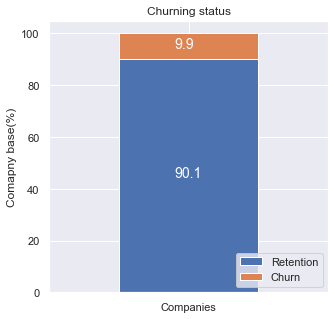

In [21]:
plot_stacked_bars(churn_percantage.transpose(),"Churning status",(5,5),legend_="lower right")

About 10% of customers have churned

# SME activity

In [22]:
activity = train[["id","activity_new","churn"]]

In [23]:
activity = activity.groupby([activity["activity_new"],activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0],ascending = False)

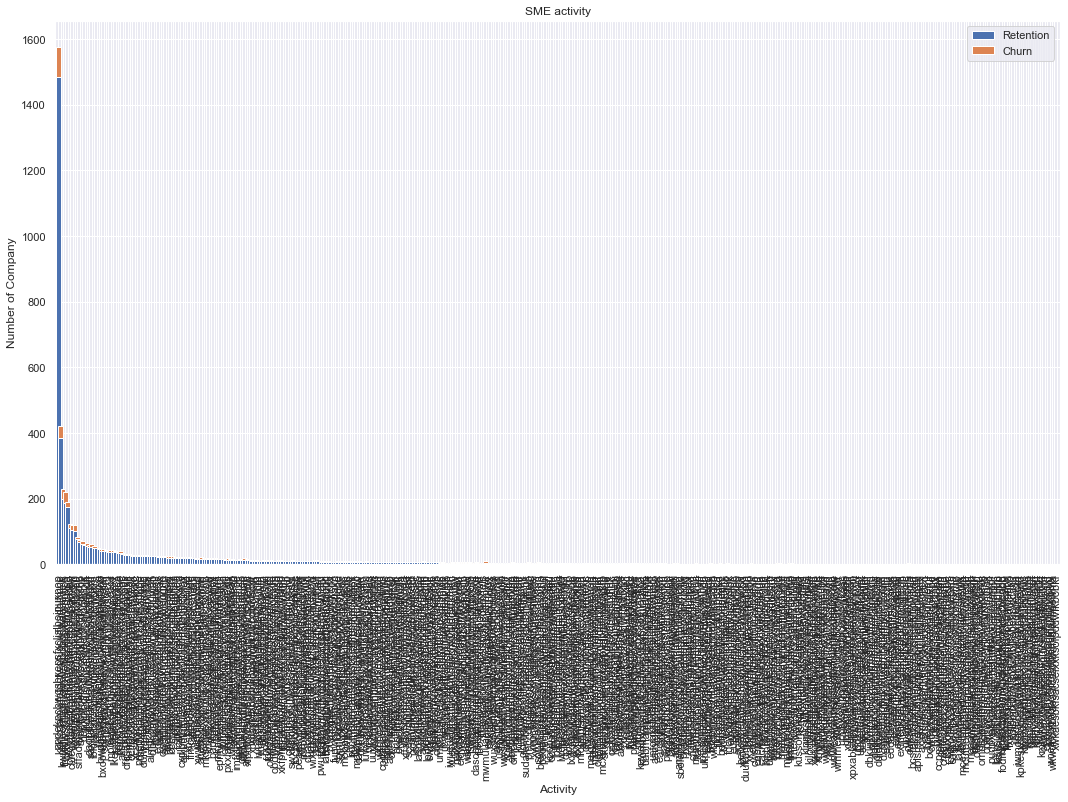

In [24]:
activity.plot(kind="bar",
             figsize = (18,10),
             width = 2,
             stacked = True,
             title = "SME activity")
plt.ylabel("Number of Company")
plt.xlabel("Activity")
plt.legend(["Retention","Churn"],loc="upper right")
plt.xticks()
plt.show()

In [25]:
activity_total = activity.fillna(0)[0]+activity.fillna(0)[1]
activty_percantage =  activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({"Percantage churn":activty_percantage,
             "Total company": activity_total}).sort_values(by="Percantage churn",ascending=False).head(10)

,Percantage churn,Total company
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


# Sales Channel

In [26]:
channel = train[["id","channel_sales","churn"]]

In [27]:
channel = channel.groupby([channel["channel_sales"],channel["churn"]])["id"].count().unstack(level=1).fillna(0)

In [28]:
channel_churn = (channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

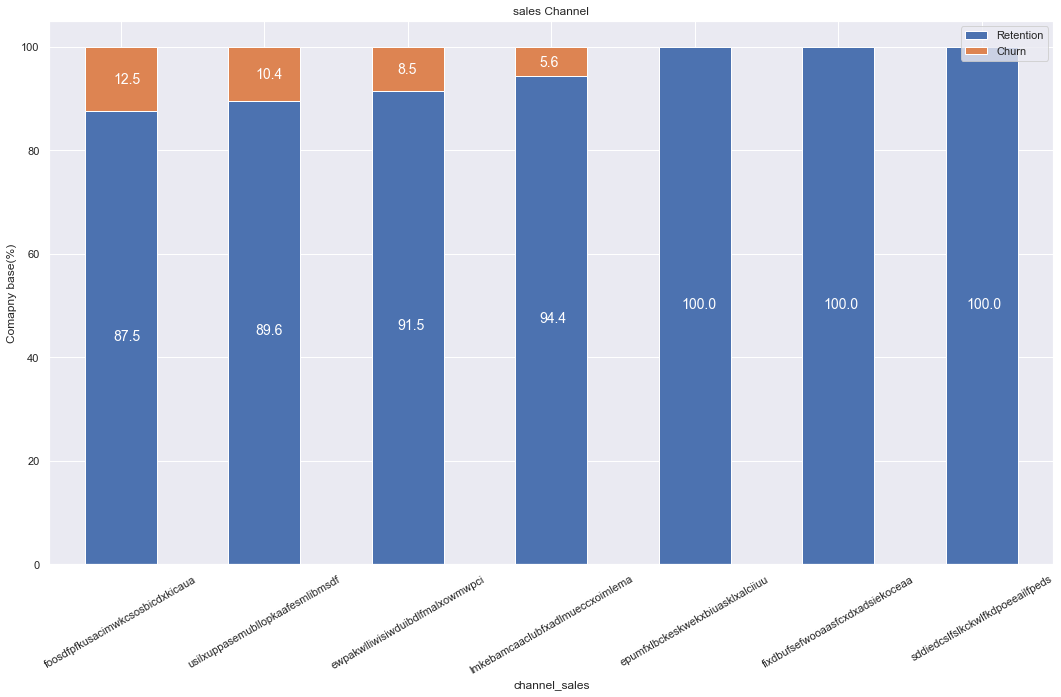

In [29]:
plot_stacked_bars(channel_churn,"sales Channel",rot_=30)

In [30]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percantage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn Percantage": channel_percantage,
             "Total companies":channel_total}).sort_values(by="Churn Percantage",ascending = False).head(10)



,Churn Percantage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


# Consumption

In [31]:
consumption = train[["id","cons_12m","cons_gas_12m","cons_last_month","imp_cons","has_gas","churn"]]

In [32]:
def plot_distribution(dataframe,column,ax,bins_ = 50):
    temp = pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
                        "Churn":dataframe[dataframe["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind="hist",bins=bins_,ax=ax,stacked =True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style="plain",axis="x")

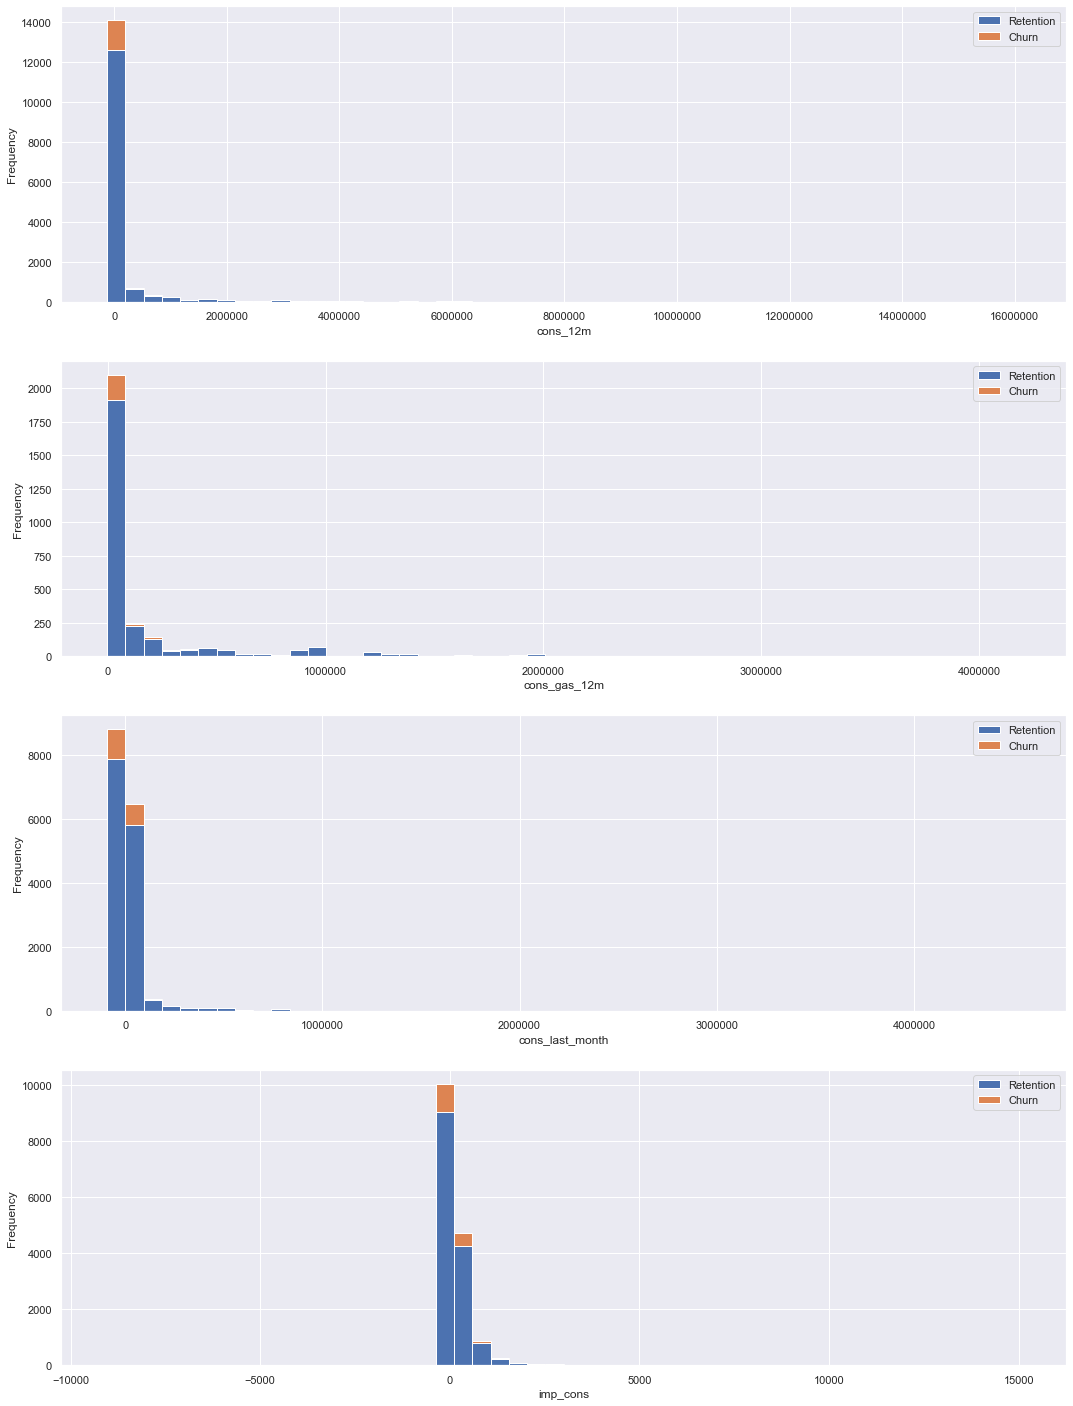

In [33]:
fig , axs = plt.subplots(nrows=4,figsize=(18,25))
#plotting histogram
plot_distribution(consumption,"cons_12m",axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'],"cons_gas_12m",axs[1])
plot_distribution(consumption,"cons_last_month",axs[2])
plot_distribution(consumption,"imp_cons",axs[3])

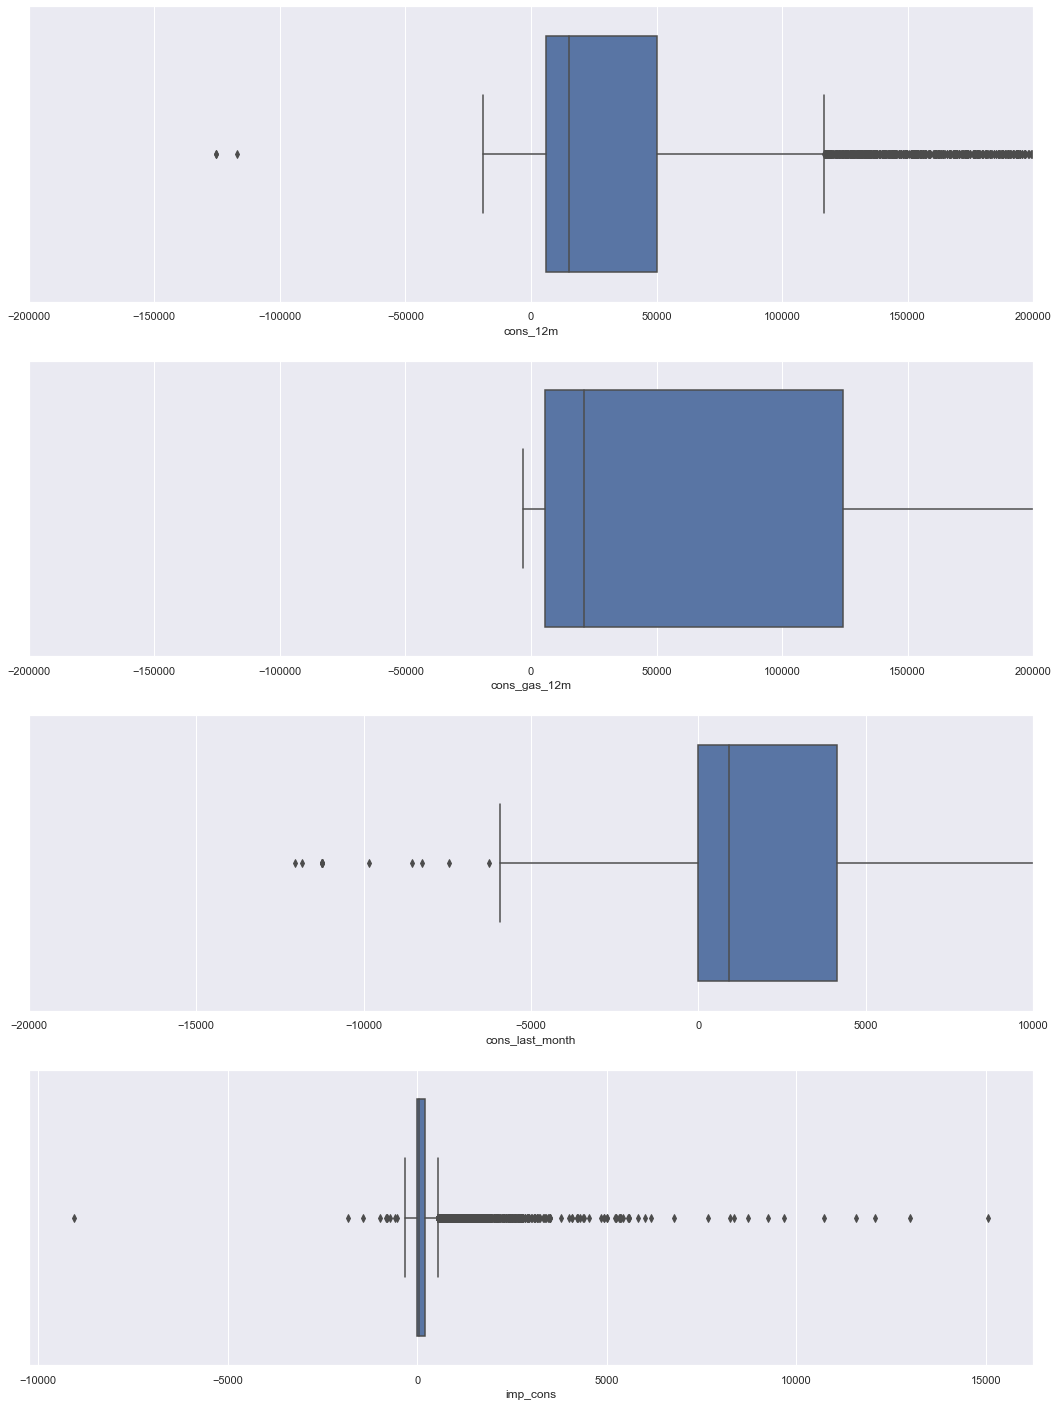

In [34]:
fig , axs =plt.subplots(nrows=4,figsize=(18,25))
#plot histogram
sns.boxplot(consumption["cons_12m"],ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"],ax=axs[1])
sns.boxplot(consumption["cons_last_month"],ax=axs[2])
sns.boxplot(consumption["imp_cons"],ax=axs[3])
#removing scientific notation
axs[0].set_xlim(-200000,200000)
axs[1].set_xlim(-200000,200000)
axs[2].set_xlim(-20000,10000)
plt.show()

# Dates

In [35]:
dates = train[["id","date_activ","date_end","date_modif_prod","date_renewal","churn"]].copy()

In [36]:
#transforming date type column to datetime type
dates["dates_activ"] = pd.to_datetime(dates["date_activ"], format ='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format = '%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format = "%Y-%m-%d")
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format = "%Y-%m-%d")

In [37]:
def plot_dates(dataframe, column, fontsize_ = 12):
    #grouping by month
    temp = dataframe[[column,
                     "churn",
                     "id"]].set_index(column).groupby([pd.Grouper(freq='M'),"churn"]).count().unstack(level=1)
    #plot
    ax = temp.plot(kind = "bar",stacked=True,figsize=(18,10),rot=0)
    #changinig x axis label to months
    ax.set_xticklabels(map(lambda x:line_format(x),temp.index))
    #changing x label size
    plt.xticks(fontsize = fontsize_)
    # renaming y axis
    plt.ylabel("Number of companies")
    # rename legend
    plt.legend(["Retention","Churn"], loc = "upper right")
    plt.show()

In [38]:
def line_format(label):
    month = label.month_name()[:1]
    if label.month_name() == 'January':
        month += f'\n{label.year}'
    return(month)

In [39]:
plot_dates(dates,"date_activ",fontsize_= 8)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

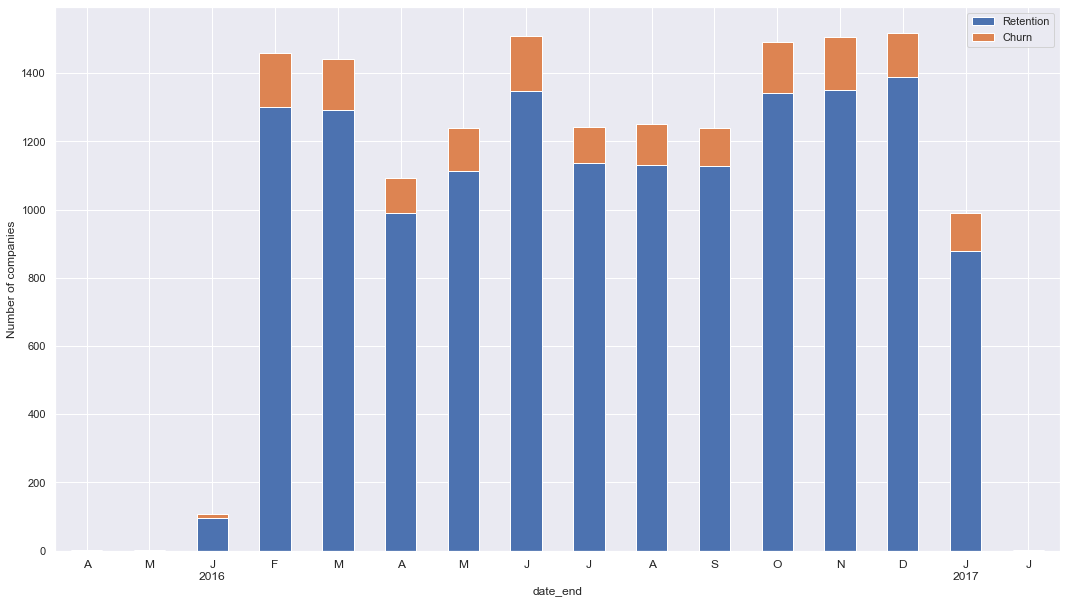

In [40]:
plot_dates(dates,'date_end')

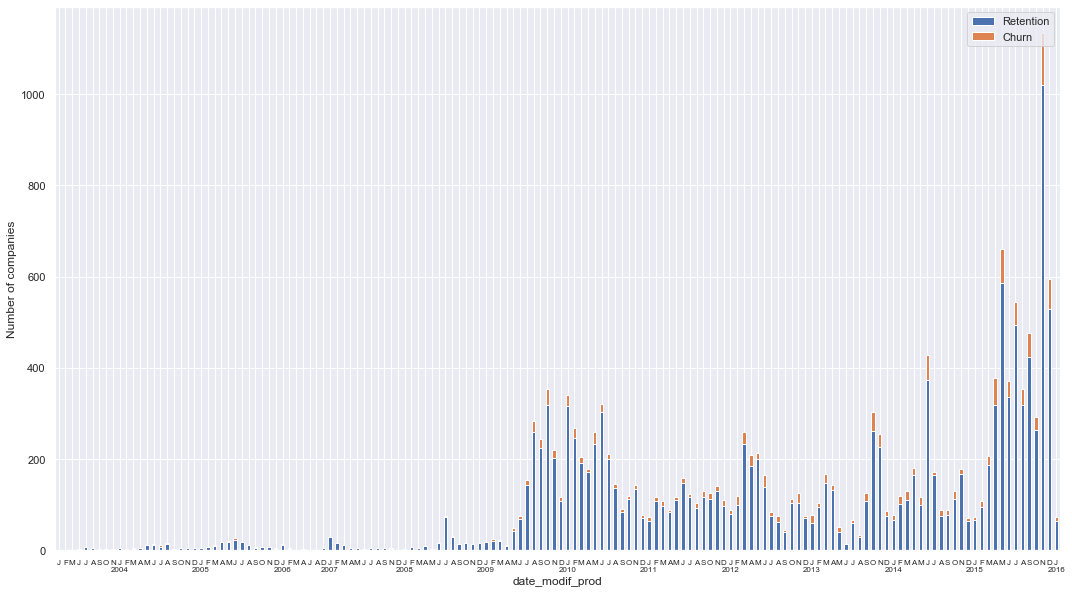

In [41]:
plot_dates(dates,"date_modif_prod",fontsize_= 8)

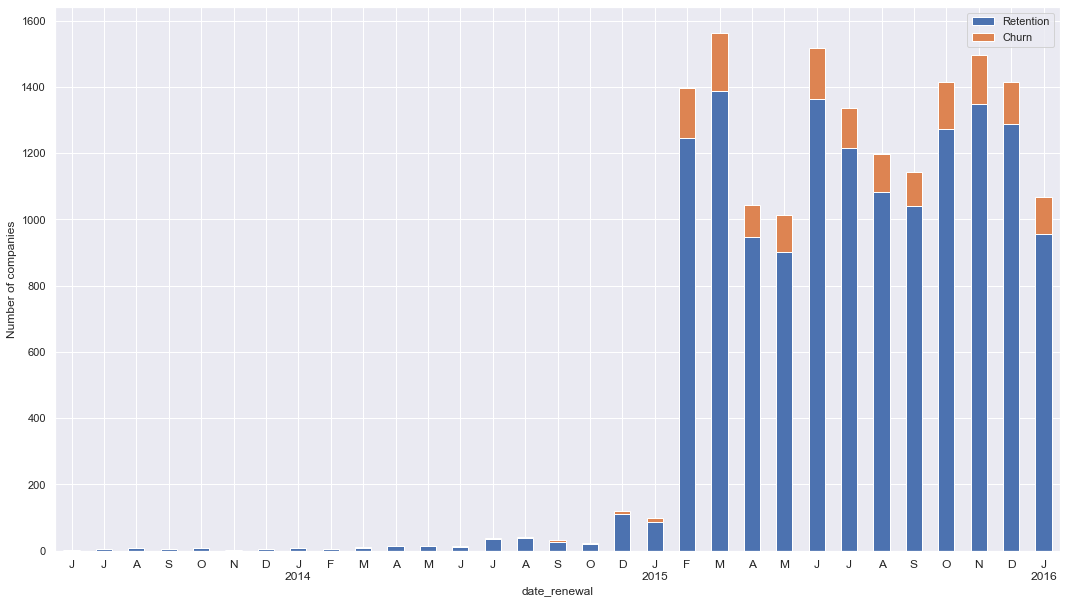

In [42]:
plot_dates(dates,"date_renewal")

# Forecast

In [43]:
forecast = train[["id","forecast_base_bill_ele","forecast_base_bill_year","forecast_bill_12m","forecast_cons","forecast_cons_12m",
                 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m","forecast_price_energy_p1",
                 "forecast_price_energy_p2","forecast_price_pow_p1","churn"]]

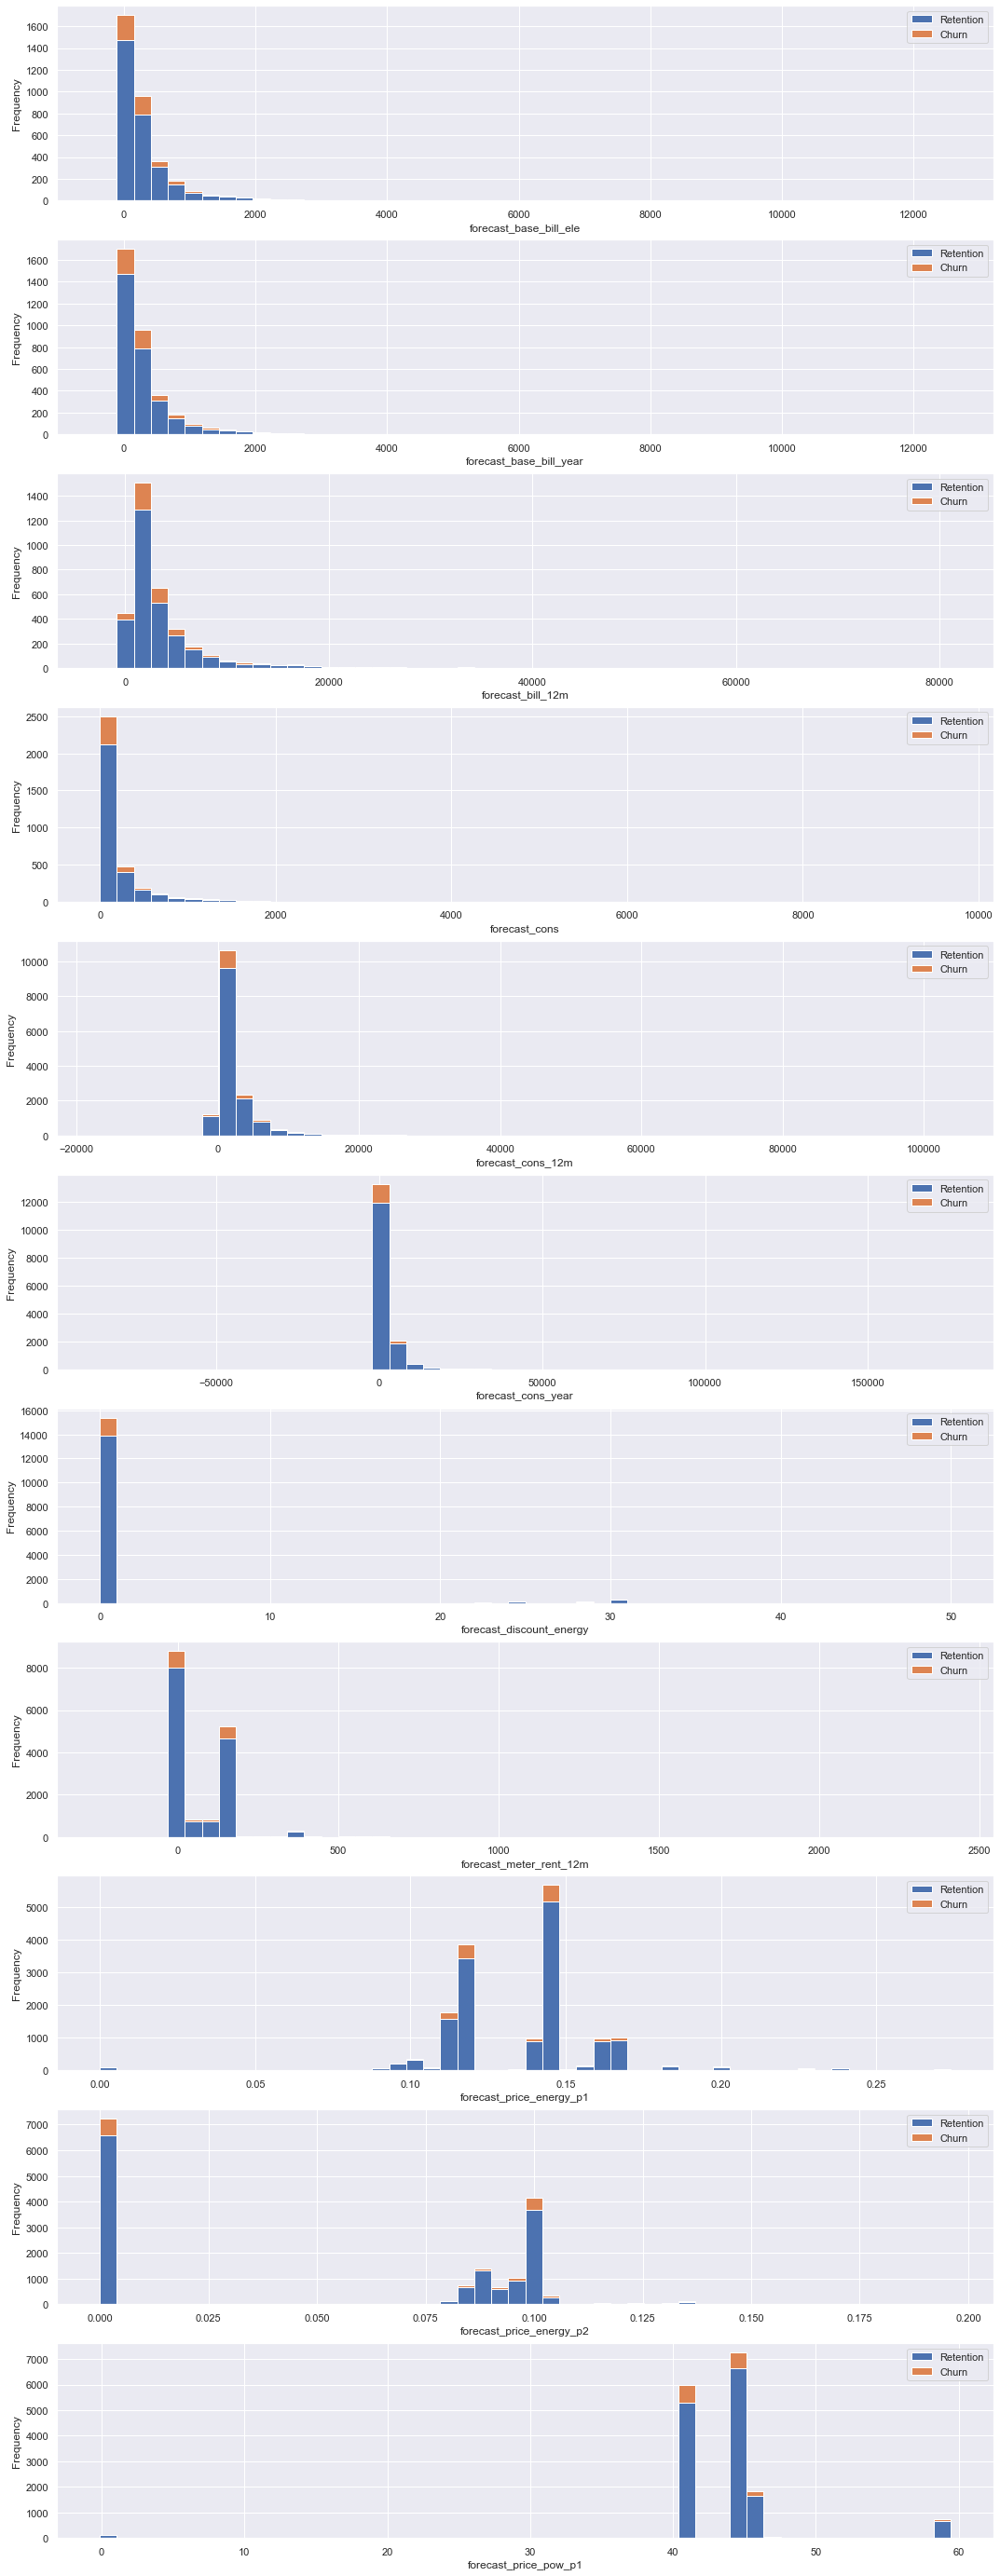

In [44]:
fig , axs = plt.subplots(nrows=11,figsize=(18,50))
#plotting histogram
plot_distribution(train,"forecast_base_bill_ele",axs[0])
plot_distribution(train,"forecast_base_bill_year",axs[1])
plot_distribution(train,"forecast_bill_12m",axs[2])
plot_distribution(train,"forecast_cons",axs[3])
plot_distribution(train,"forecast_cons_12m",axs[4])
plot_distribution(train,"forecast_cons_year",axs[5])
plot_distribution(train,"forecast_discount_energy",axs[6])
plot_distribution(train,"forecast_meter_rent_12m",axs[7])
plot_distribution(train,"forecast_price_energy_p1",axs[8])
plot_distribution(train,"forecast_price_energy_p2",axs[9])
plot_distribution(train,"forecast_price_pow_p1",axs[10])

# Contract type (electricity,gas)

In [45]:
contract_type = train[["id","has_gas","churn"]]

In [46]:
contract = contract_type.groupby([contract_type["churn"],
                                 contract_type["has_gas"]])["id"].count().unstack(level = 0)

In [47]:
contract_percantage = (contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

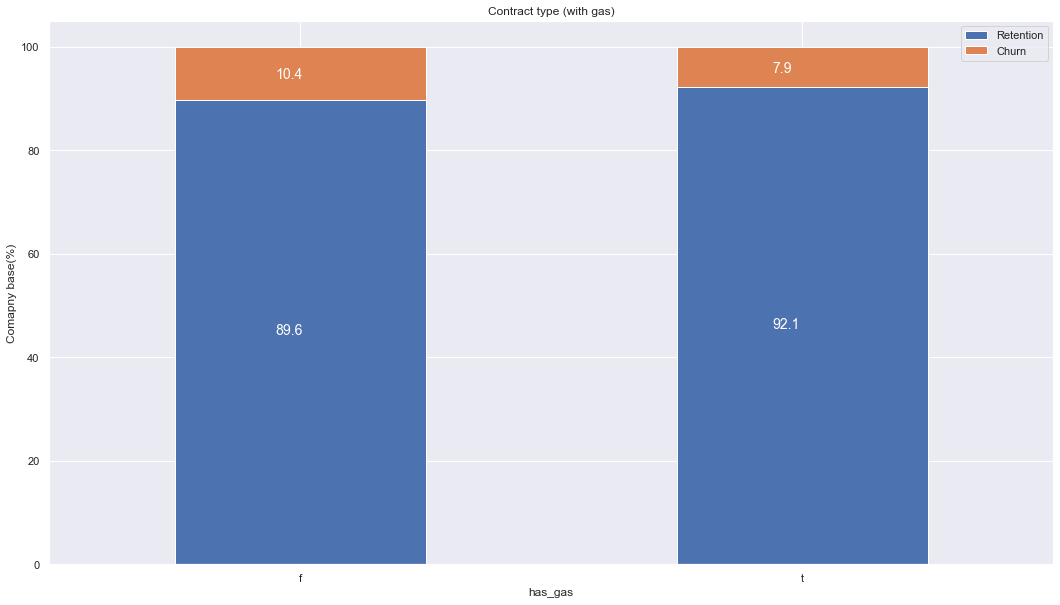

In [48]:
plot_stacked_bars(contract_percantage,"Contract type (with gas)")

In [49]:
margin = train[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

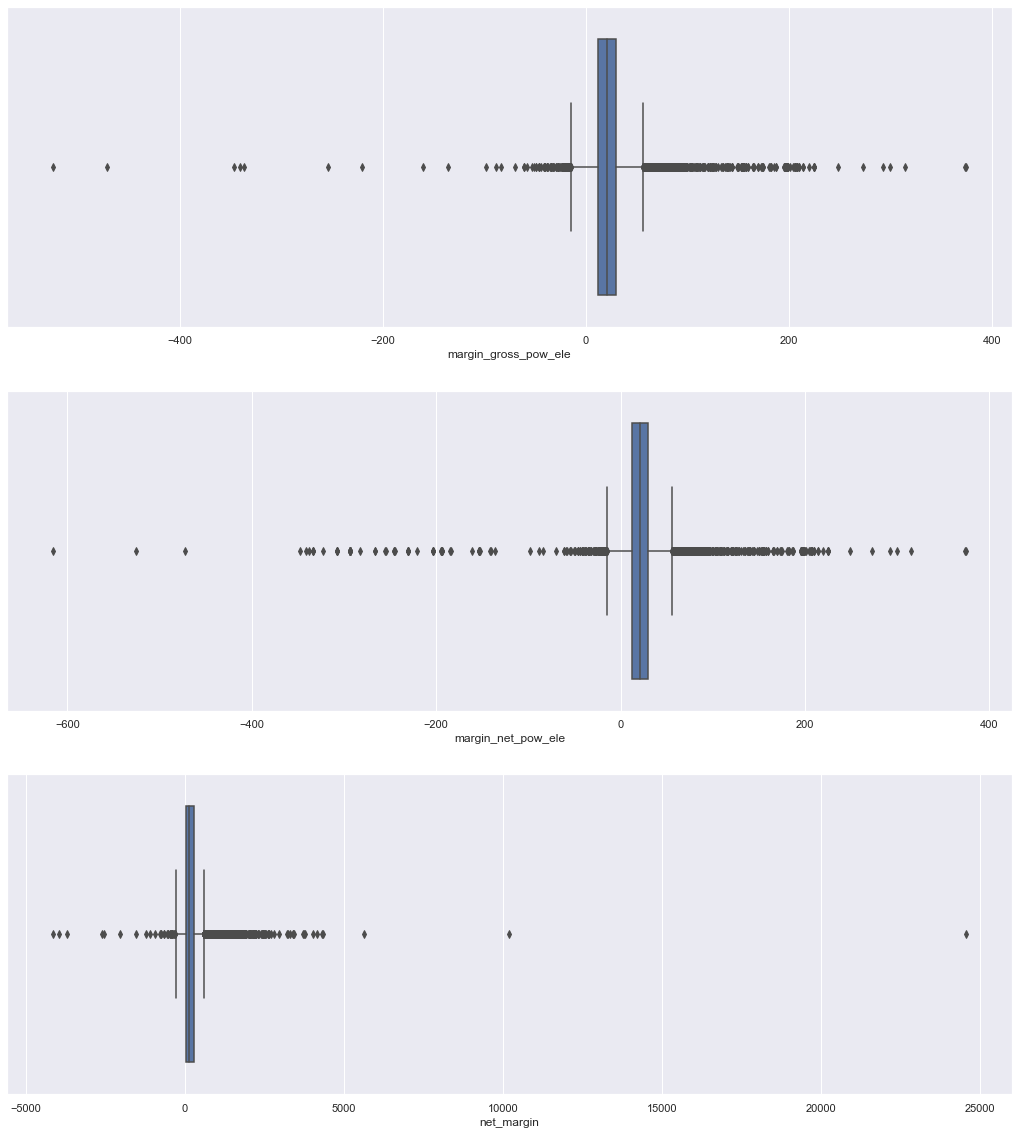

In [50]:
fig, axs = plt.subplots(nrows = 3,figsize =(18,20))
#plot boxplots
sns.boxplot(margin["margin_gross_pow_ele"],ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"],ax = axs[2])
# removing scientific notation
axs[0].ticklabel_format(style="plain",axis="x")
axs[1].ticklabel_format(style="plain",axis="x")
axs[2].ticklabel_format(style="plain",axis="x")
plt.show()

# Subscribed Power

In [51]:
power = train[["id","pow_max","churn"]].fillna(0)

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

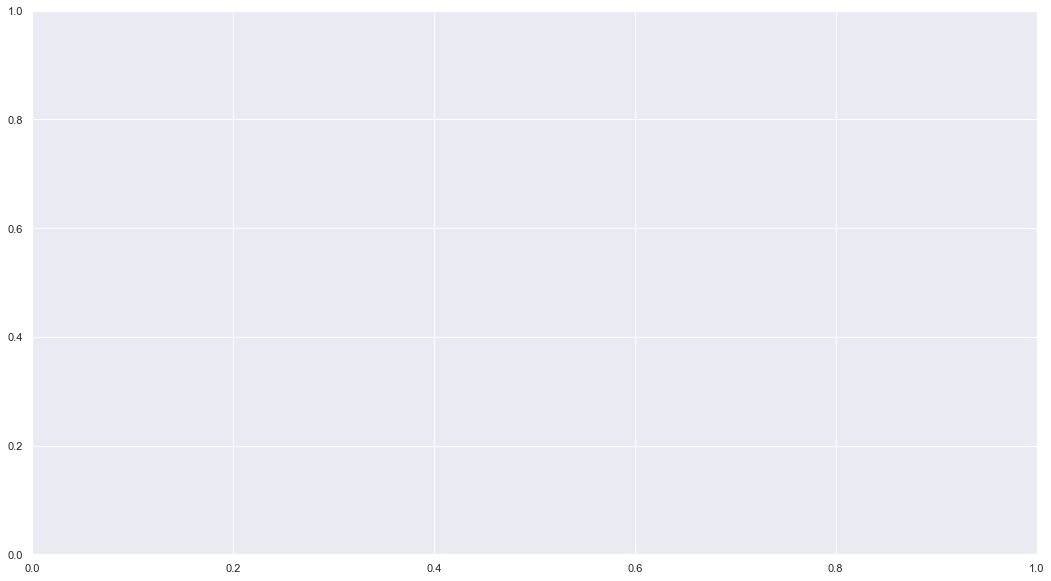

In [52]:
fig,ax = plt.subplots(nrows=1,figsize=(18,10))
plot_distribution(power,"pow_max",axs)

# Other

In [53]:
others = train[["id","nb_prod_act","num_years_antig","origin_up","churn"]]

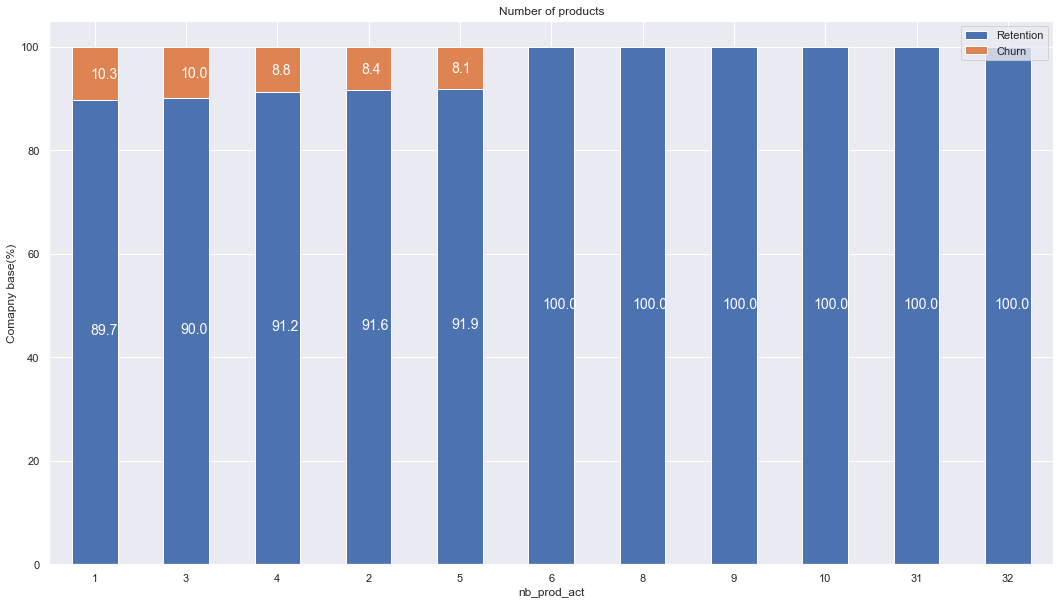

In [54]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
plot_stacked_bars(products_percentage,"Number of products")


In [55]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)

In [56]:
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1),axis=0)*100)

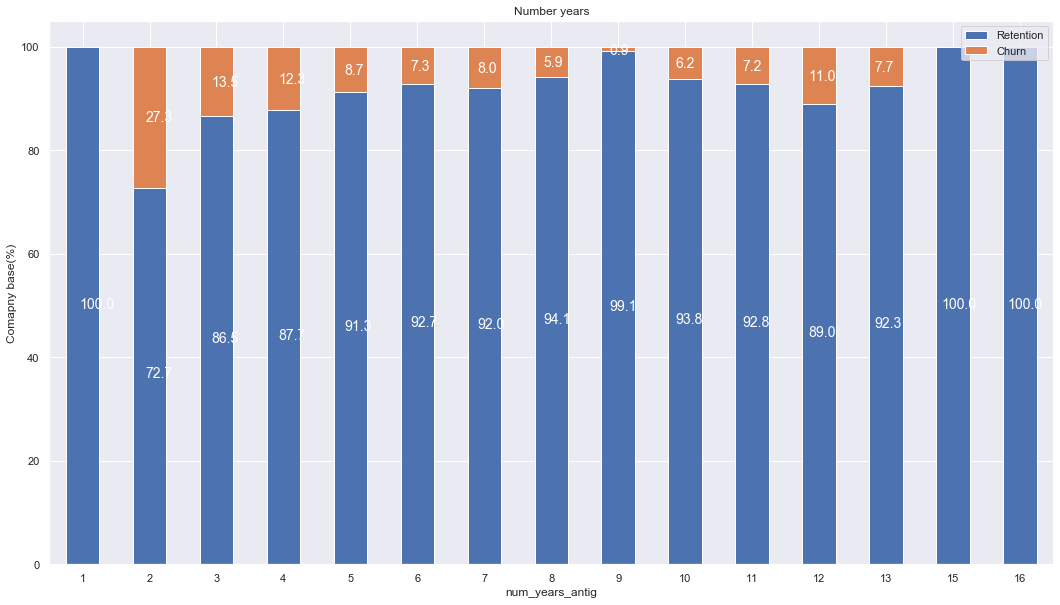

In [57]:
plot_stacked_bars(years_antig_percentage,"Number years")

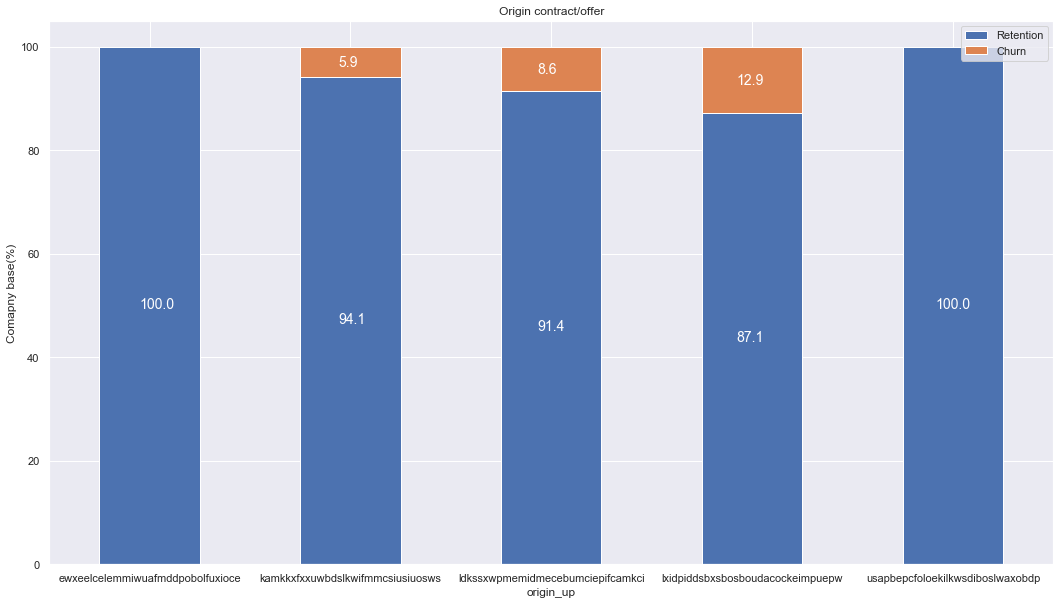

In [58]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1),axis=0)*100)
plot_stacked_bars(origin_percentage,"Origin contract/offer")

In [59]:
#Data cleaning
#missing data

In [60]:
#potting missing data

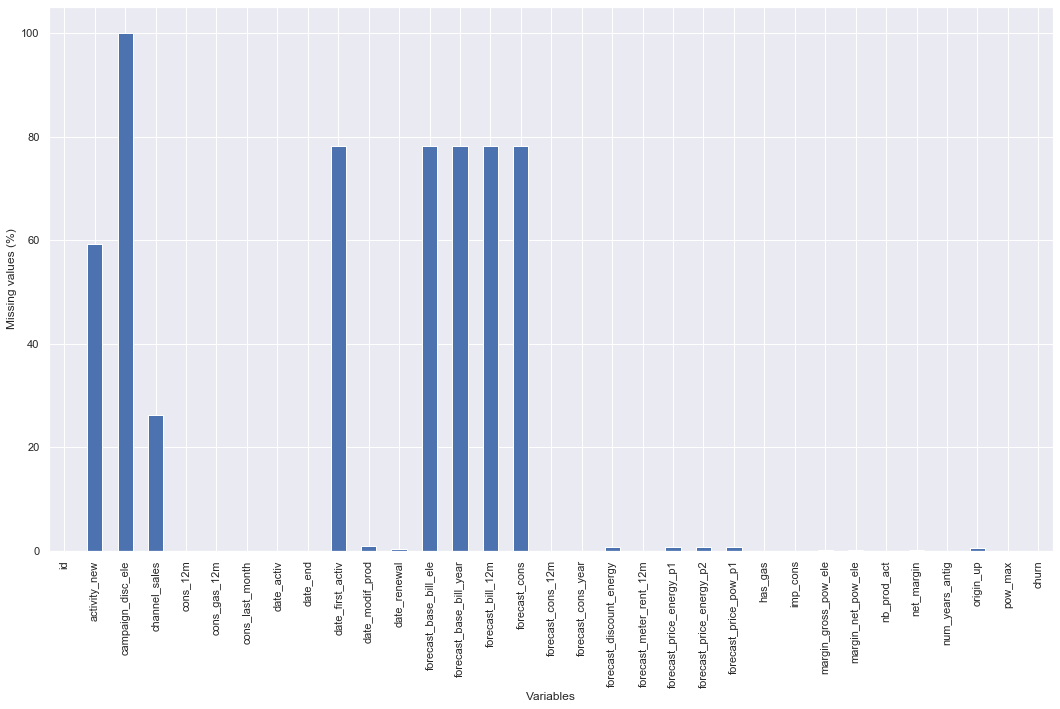

In [61]:
(train.isnull().sum()/len(train.index)*100).plot(kind="bar",figsize=(18,10))
# setting axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

In [62]:
train.drop(columns=["campaign_disc_ele","date_first_activ","forecast_base_bill_ele",
                   "forecast_base_bill_year","forecast_bill_12m","forecast_cons"],inplace=True)

In [63]:
pd.DataFrame({"Dataframe columns":train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


In [64]:
#dealing with duplicates

In [65]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [66]:
#missing dates
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"] = train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(),"date_renewal"] = train["date_renewal"].value_counts().index[0]

In [67]:
#missing data in history data
missing_data_percantage = history_data.isnull().sum()/len(history_data.index)*100


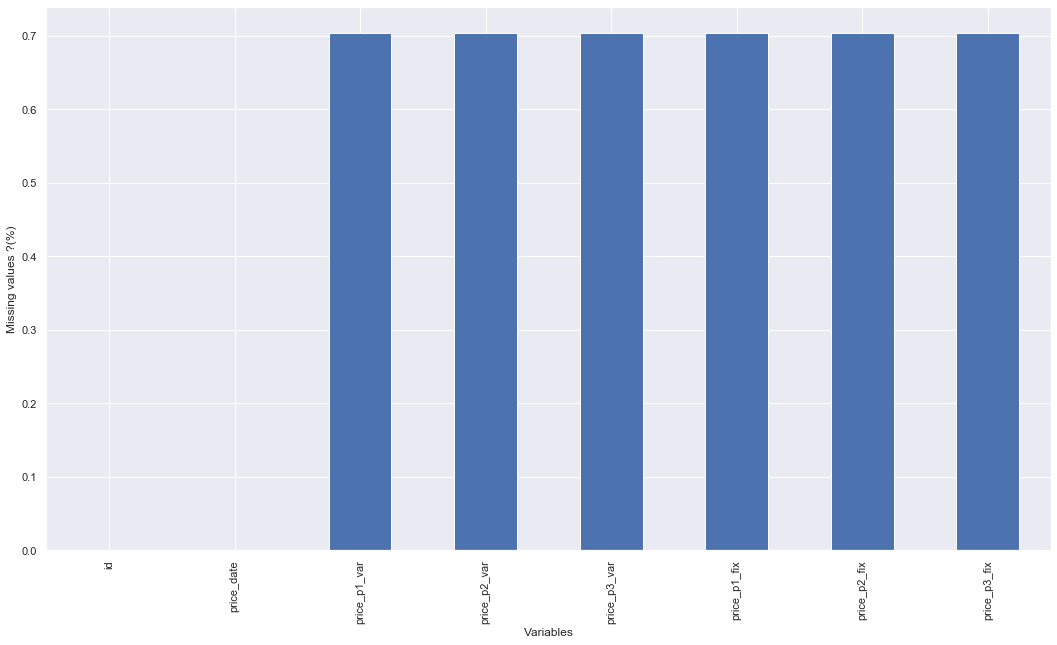

In [68]:
missing_data_percantage.plot(kind="bar",figsize=(18,10))
plt.xlabel("Variables")
plt.ylabel("Missing values ?(%)")
plt.show()


In [69]:
# there is not much missing data insted of removing columns we can replace missingu values with mean or median

In [70]:
history_data[history_data.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
history_data.loc[history_data["price_p1_var"].isnull(),"price_p1_var"] = history_data["price_p1_var"].median()
history_data.loc[history_data["price_p2_var"].isnull(),"price_p2_var"] = history_data["price_p2_var"].median()
history_data.loc[history_data["price_p3_var"].isnull(),"price_p3_var"] = history_data["price_p3_var"].median()
history_data.loc[history_data["price_p1_fix"].isnull(),"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"].isnull(),"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"].isnull(),"price_p3_fix"] = history_data["price_p3_fix"].median()

In [72]:
#Formatting Dates
train["date_activ"] = pd.to_datetime(train["date_activ"],format = "%Y-%m-%d")
train["date_end"] = pd.to_datetime(train["date_end"],format = "%Y-%m-%d")
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"],format = "%Y-%m-%d")
train["date_renewal"] = pd.to_datetime(train["date_renewal"],format = "%Y-%m-%d")

In [73]:
#formatting dates in historical data
history_data["price_date"] = pd.to_datetime(history_data["price_date"],format = "%Y-%m-%d")

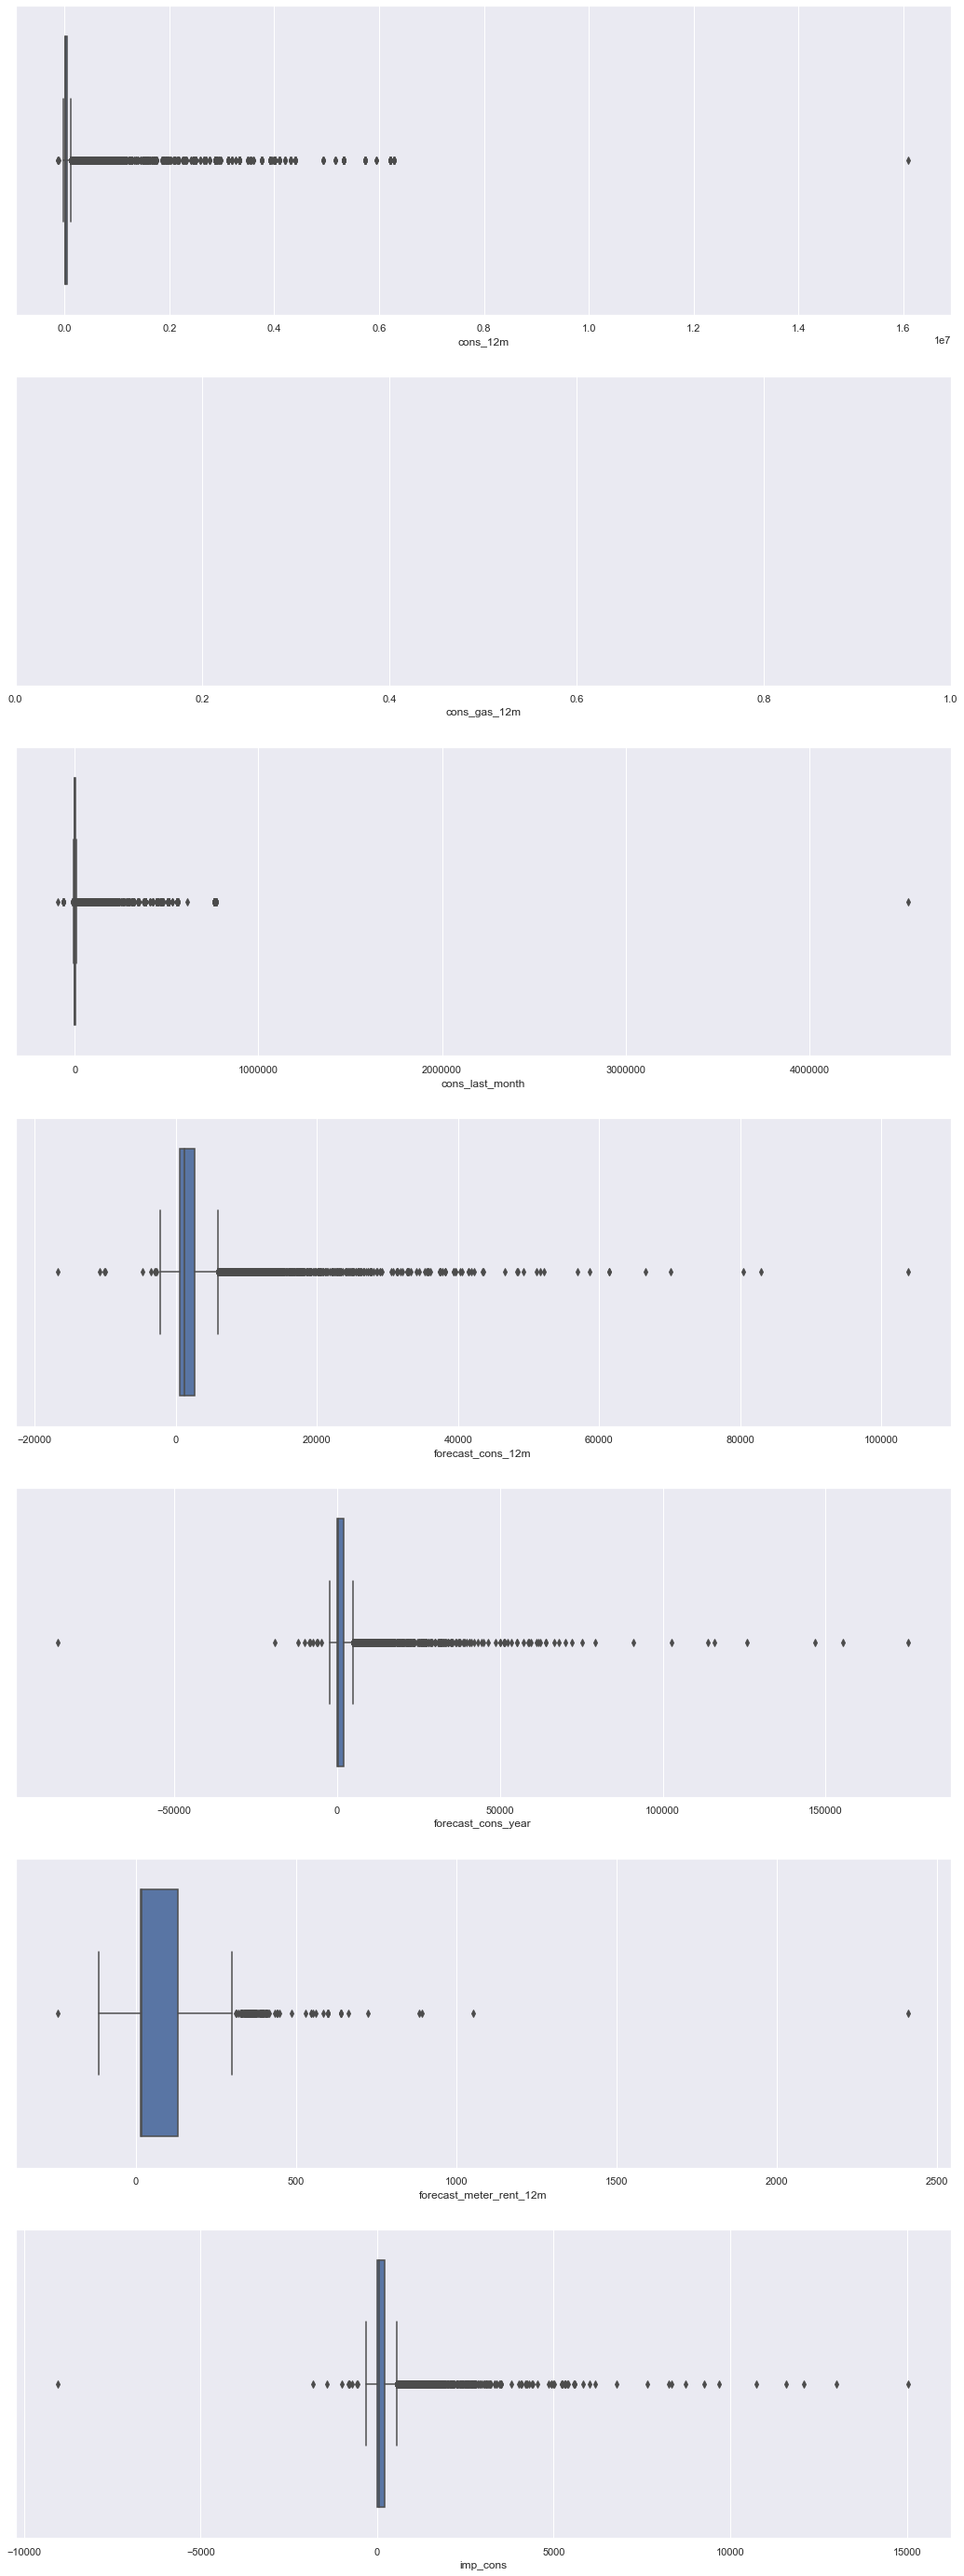

In [74]:
fig , axs = plt.subplots(nrows = 7,figsize=(18,50))
sns.boxplot((train["cons_12m"].dropna()),ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()),ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()),ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()),ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()),ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()),ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()),ax=axs[6])
plt.show()

In [75]:
# dealing with negative data


In [76]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [77]:
history_data[(history_data.price_p1_fix < 0) | (history_data.price_p2_fix < 0 ) | (history_data.price_p3_fix <0) ]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [78]:
history_data.loc[history_data["price_p1_fix"] < 0,"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"] < 0,"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"] < 0,"price_p3_fix"] = history_data["price_p3_fix"].median()

In [79]:
# creating avergae consumption of companies in respect to years,month 

In [80]:
mean_year = history_data.groupby(["id"]).mean().reset_index()

In [81]:
mean_6m = history_data[history_data["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()

In [82]:
mean_3m = history_data[history_data["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()

In [83]:
#combining therm into single data frame

In [84]:
mean_year = mean_year.rename(index=str,columns={"price_p1_var" :"mean_year_price_p1_var",
                                                "price_p2_var" :"mean_year_price_p2_var",
                                                "price_p3_var" :"mean_year_price_p3_var",
                                                "price_p1_fix" :"mean_year_price_p1_fix",
                                                "price_p2_fix" :"mean_year_price_p2_fix",
                                                "price_p3_fix" :"mean_year_price_p3_fix"})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [85]:
mean_6m = mean_6m.rename(index=str,columns={"price_p1_var":"mean_6m_price_p1_var",
                                            "price_p2_var":"mean_6m_price_p2_var",
                                            "price_p3_var":"mean_6m_price_p3_var",
                                            "price_p1_fix":"mean_6m_price_p1_fix",
                                            "price_p2_fix":"mean_6m_price_p2_fix",
                                            "price_p3_fix":"mean_6m_price_p3_fix"})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

In [86]:
mean_3m = mean_3m.rename(index=str,columns={"price_p1_var":"mean_3m_price_p1_var",
                                            "price_p2_var":"mean_3m_price_p2_var",
                                            "price_p3_var":"mean_3m_price_p3_var",
                                            "price_p1_fix":"mean_3m_price_p1_fix",
                                            "price_p2_fix":"mean_3m_price_p2_fix",
                                            "price_p3_fix":"mean_3m_price_p3_fix"})
mean_3m["mean_6m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_6m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_6m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

In [87]:
#merging all these into one data frame
#features = pd.merge(mean_year,mean_6m,mean_3m,on="id")
features = mean_year

In [88]:
train["tenure"] = ((train["date_end"] - train["date_activ"])/np.timedelta64(1,"Y")).astype("int")

In [89]:
tenure = train[["tenure","churn","id"]].groupby(["tenure","churn"])["id"].count().unstack(level=1)
tenure_percantge = (tenure.div(tenure.sum(axis=1),axis=0)*100)

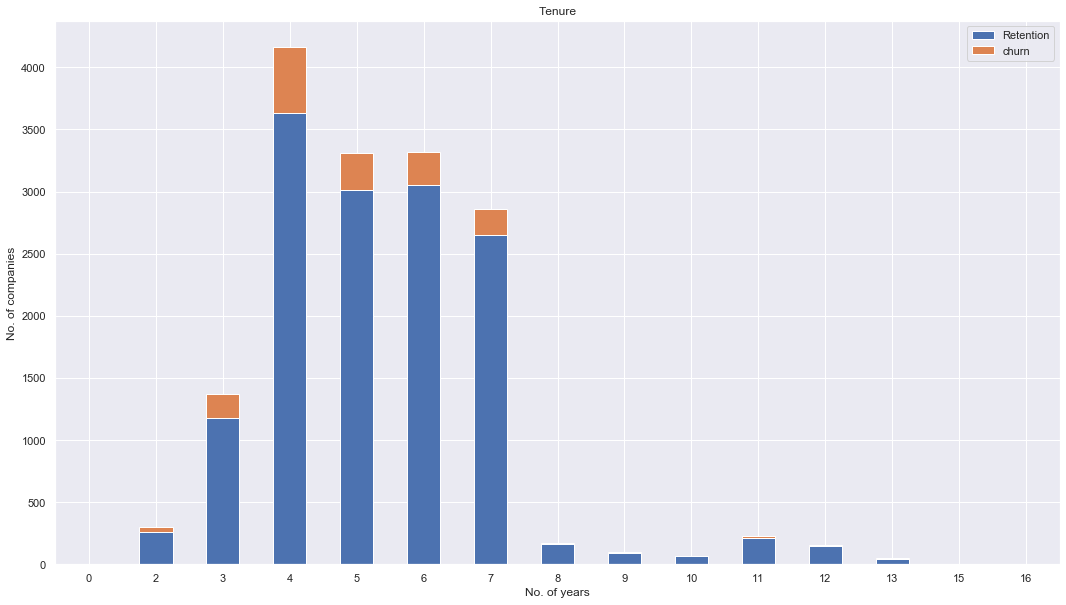

In [90]:
tenure.plot(kind="bar",
                       figsize =(18,10),
                       stacked = True,
                       rot =0,
                       title = "Tenure")
#renaming legend
plt.legend(["Retention","churn"], loc = "upper right")
#Lables
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

In [91]:
# Transforming dates such that it will easy to understand

In [92]:
def convert_months(reference_date,dataframe,column):
    time_delta = REFERENCE_DATE - dataframe[column]
    months = (time_delta/np.timedelta64(1,"M")).astype(int)
    return(months)

In [93]:
REFERENCE_DATE = datetime.datetime(2016,1,1)

In [94]:
train["months_activ"] = convert_months(REFERENCE_DATE,train,"date_activ")
train["months_to_end"] = -convert_months(REFERENCE_DATE,train,"date_end")
train["months_modif_prod"] = convert_months(REFERENCE_DATE,train,"date_modif_prod")
train["months_renewal"] = convert_months(REFERENCE_DATE,train,"date_renewal")


In [95]:
def plot_churn_by_month(dataframe,column,fontsize_ = 11):
    temp = dataframe[[column,"churn","id"]].groupby([column,"churn"])["id"].count().unstack(level=1)
    temp.plot(kind = "bar",
             figsize=(18,10),
             stacked = True,
             rot = 0,
             title = column)
    #renaming legend
    plt.legend(["Retention","Churn"],loc = "upper right")
    plt.xlabel("No of month")
    plt.ylabel("No of companies")
    plt.xticks(fontsize=fontsize_)
    plt.show()

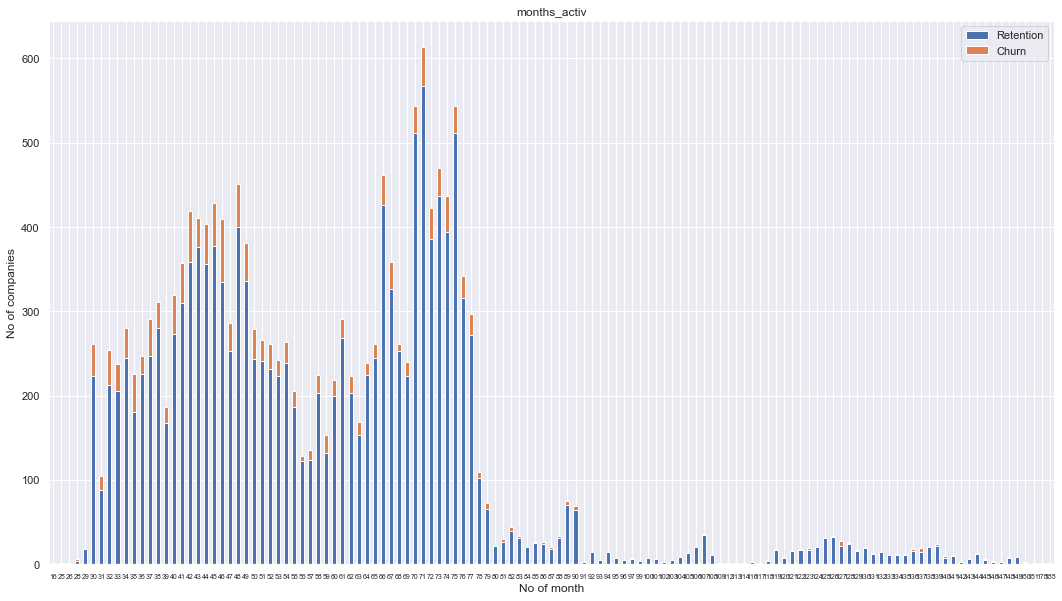

In [96]:
plot_churn_by_month(train,"months_activ",7)

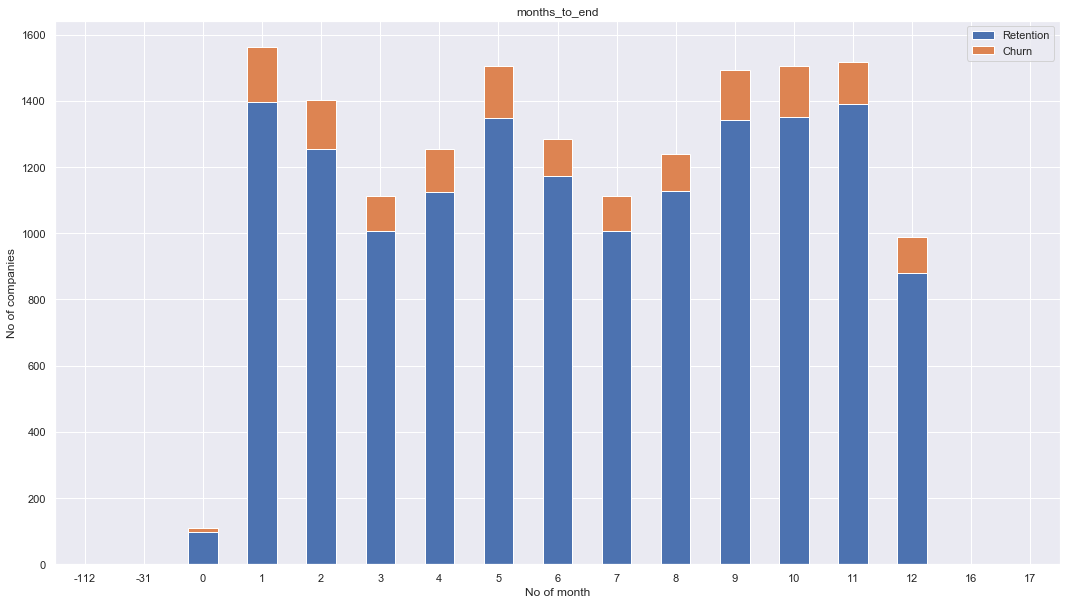

In [97]:
plot_churn_by_month(train,"months_to_end")

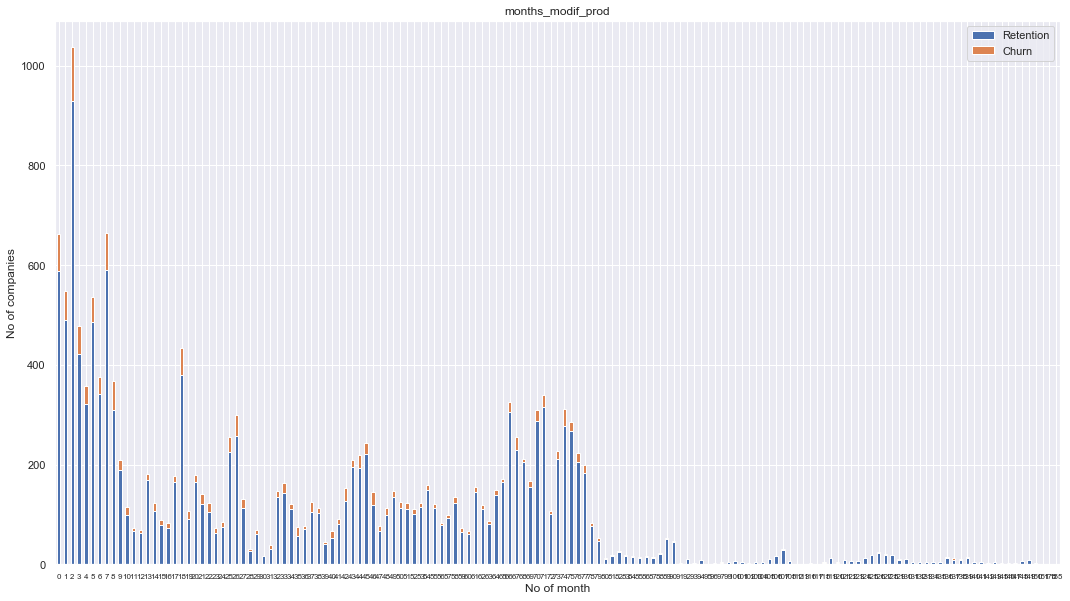

In [98]:
plot_churn_by_month(train,"months_modif_prod",8)

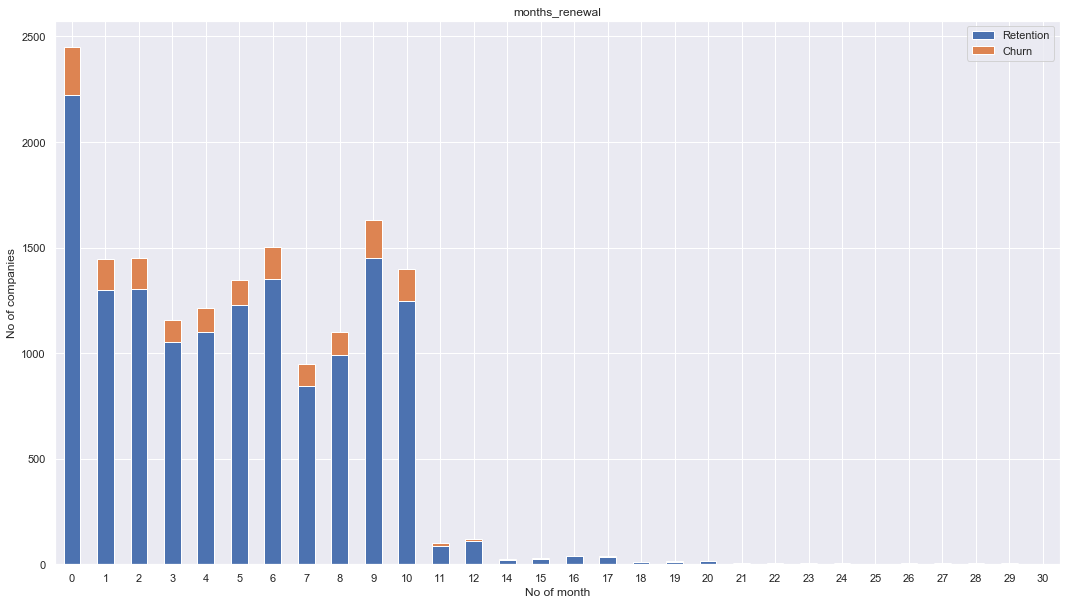

In [99]:
plot_churn_by_month(train,"months_renewal")

In [100]:
#removing date column

In [101]:
train.drop(columns=["date_activ","date_end","date_modif_prod","date_renewal"],inplace=True)

In [102]:
# transforming has gas into to boolean For true(t) 1 and for false(f) 0

In [103]:
train["has_gas"] = train["has_gas"].replace(["t","f"],[1,0])

In [104]:
#changing values in dummy variables or one hot encoding

In [105]:
#converting all the NAN values as null_values_channel

In [106]:
train["channel_sales"] = train["channel_sales"].fillna("null_values_channel")

In [107]:
#transforming channel data into categorical data
train["channel_sales"] = train["channel_sales"].astype("category")

In [108]:
pd.DataFrame({"Sample in categiry" : train["channel_sales"].value_counts()})

,Sample in categiry
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [109]:
category_channel = pd.get_dummies(train["channel_sales"],prefix="channel")

In [110]:
category_channel.columns = [col_name[:11] for col_name in category_channel.columns]

In [111]:
category_channel.head()

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [112]:
category_channel.drop(columns=["channel_nul"],inplace = True)

In [113]:
# categorical data Origin up

In [114]:
train["origin_up"] = train["origin_up"].fillna("null_values_origin")

In [115]:
train["origin_up"] = train["origin_up"].astype("category")

In [116]:
pd.DataFrame({"Sample in Category" : train["origin_up"].value_counts()})

,Sample in Category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [117]:
categories_origin = pd.get_dummies(train["origin_up"],prefix = "origin")

In [118]:
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [119]:
categories_origin.head(5)

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [120]:
categories_origin.drop(columns=["origin_nul"],inplace=True)

In [121]:
# Feature Engineeering of Categorical Data

In [122]:
train["activity_new"] = train["activity_new"].fillna("null_values_activity")

In [123]:
categories_activity = pd.DataFrame({"Activity Sample":train["activity_new"].value_counts()})

In [124]:
categories_activity

,Activity Sample
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
aplsmkockmiifibukmmmomommebkdpfk,1
kmlwkmxoocpieebifumobckeafmidpxf,1
laslwixpcspcffiadlfkeosicpsuaboc,1
ifdlbmlxdpwlpxkidiblliebeupwcaxu,1


In [125]:
to_replace = list(categories_activity[categories_activity["Activity Sample"] <= 75].index)

In [126]:
train["activity_new"] = train["activity_new"].replace(to_replace,"null_values_activity")

In [127]:
categories_activity = pd.get_dummies(train["activity_new"],prefix = "activity")
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]

In [128]:
categories_activity.head(5)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [129]:
categories_activity.drop(columns = ["activity_nul"],inplace =True)

In [130]:
# mergin all the dummies varialbe using commo0n index

In [131]:
train = pd.merge(train, category_channel  ,left_index = True , right_index = True)
train = pd.merge(train, categories_origin , left_index = True, right_index = True)
train = pd.merge(train, categories_activity , left_index= True , right_index = True)

In [132]:
train.drop(columns=["channel_sales","origin_up","activity_new"],inplace = True)

In [133]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,0.184145,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.329958,58.929858,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,0.387615,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796,1.749248,20.125024,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,16.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,0.000000,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,0.000000,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,1.000000,15042.790000

Paticularly looking Some values have high values for standard deviation
Log doesnot apply on negative values so converting negative values to NaN
Also cannot apply log tranforamtion to  0 so adding constant 1

In [134]:
# Removing negative values
train.loc[train.cons_12m < 0, "cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0 ,"cons_gas_12m"] = np.nan
train.loc[train.cons_last_month <0 ,"cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
train.loc[train.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0 , "forecast_meter_rent_12m"] = np.nan
train.loc[train.imp_cons < 0 , "imp_cons"] = np.nan

In [135]:
# applying log10 transformation


In [136]:
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] =np.log(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log(train["imp_cons"]+1)

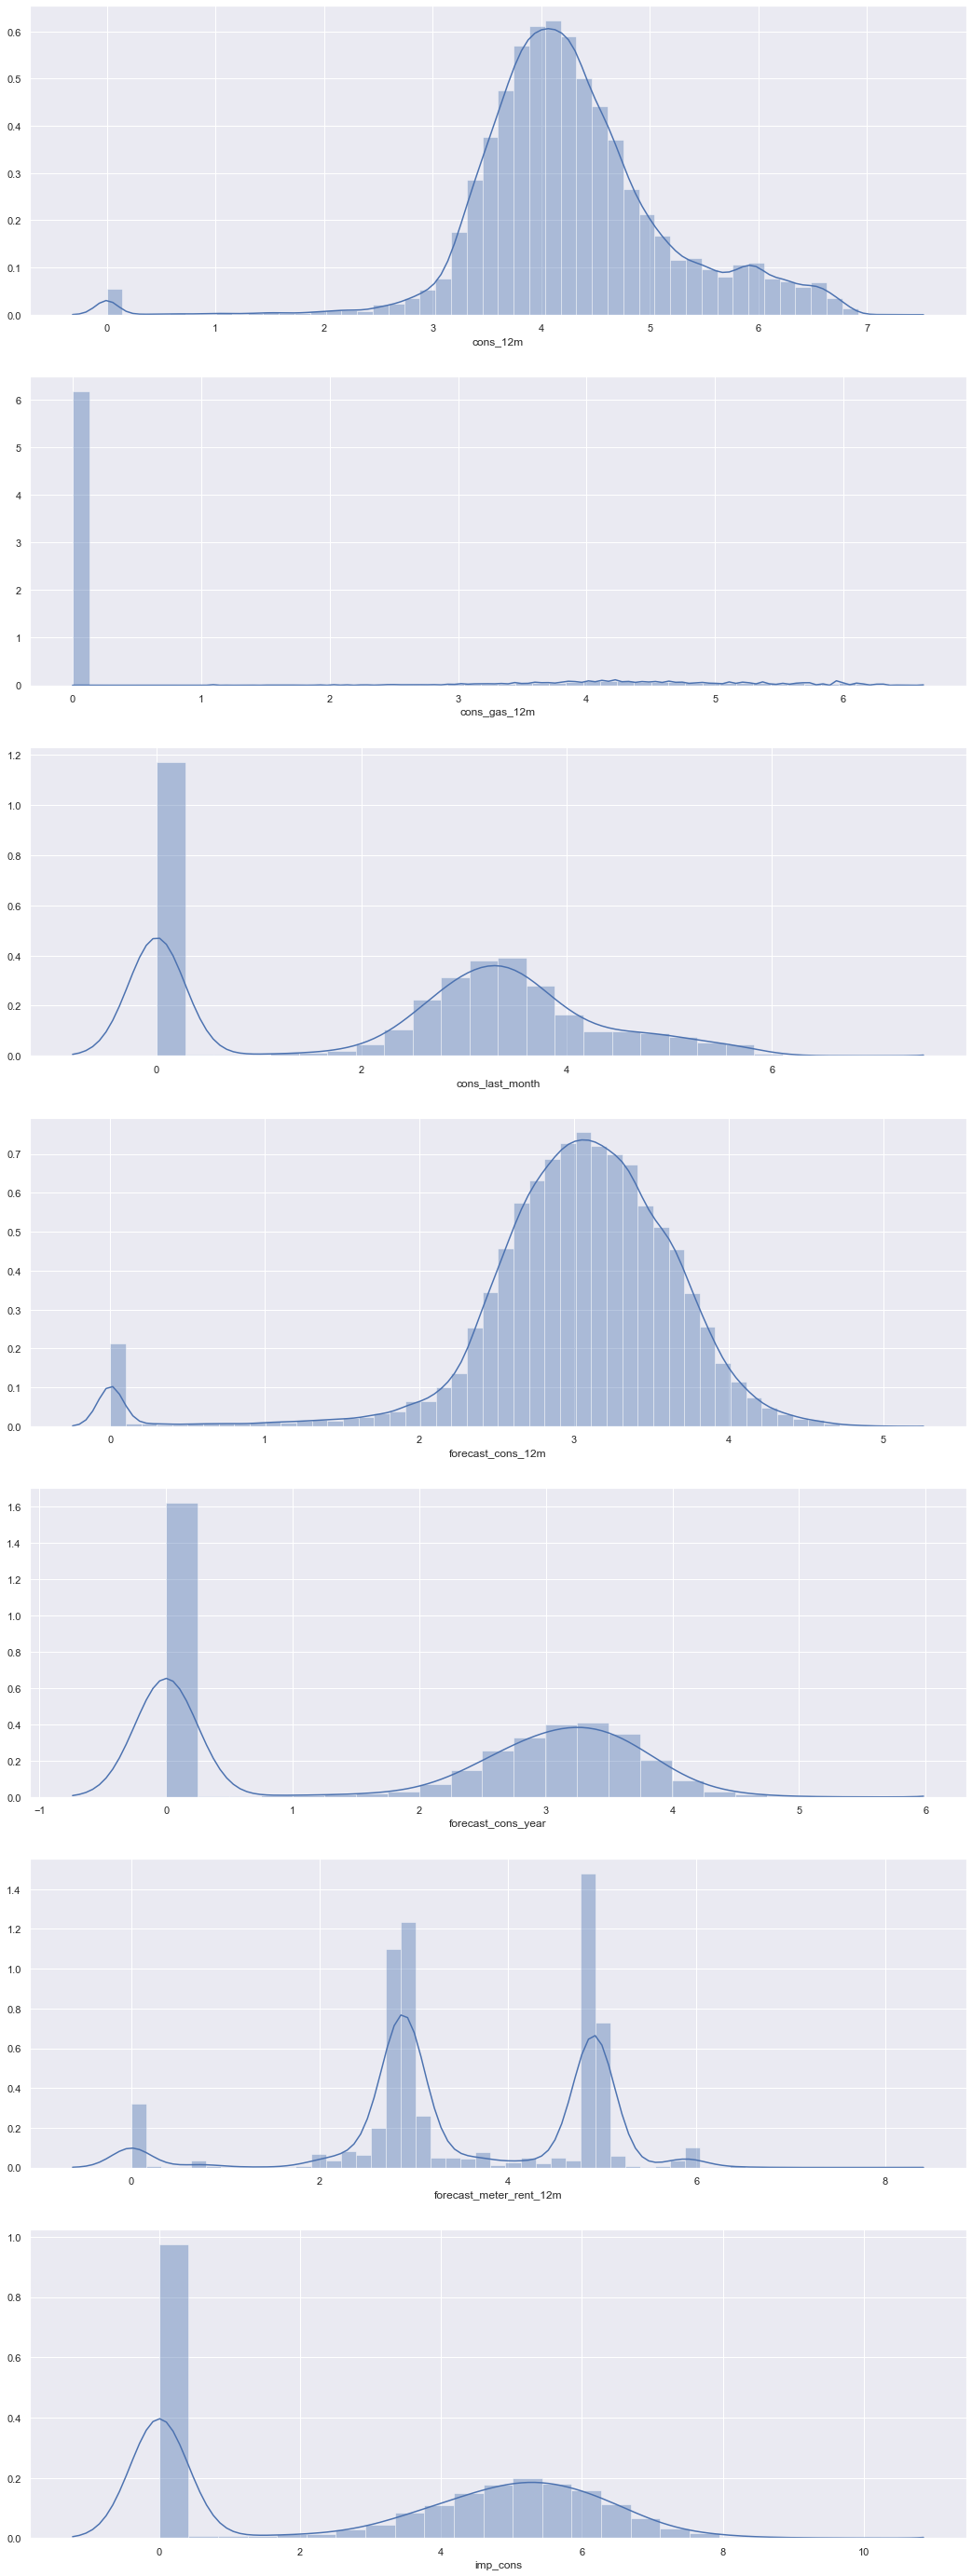

In [137]:
#lets peek on the distribution
fig , axs = plt.subplots(nrows=7,figsize = (18,50))
#plotting histogram
sns.distplot((train["cons_12m"].dropna()),ax = axs[0])
sns.distplot((train["cons_gas_12m"].dropna()),ax = axs[1])
sns.distplot((train["cons_last_month"].dropna()),ax = axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()),ax=axs[3])
sns.distplot((train["forecast_cons_year"].dropna()),ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()),ax=axs[5])
sns.distplot((train["imp_cons"].dropna()),ax=axs[6])
plt.show()

In [138]:
#checking for ouliers

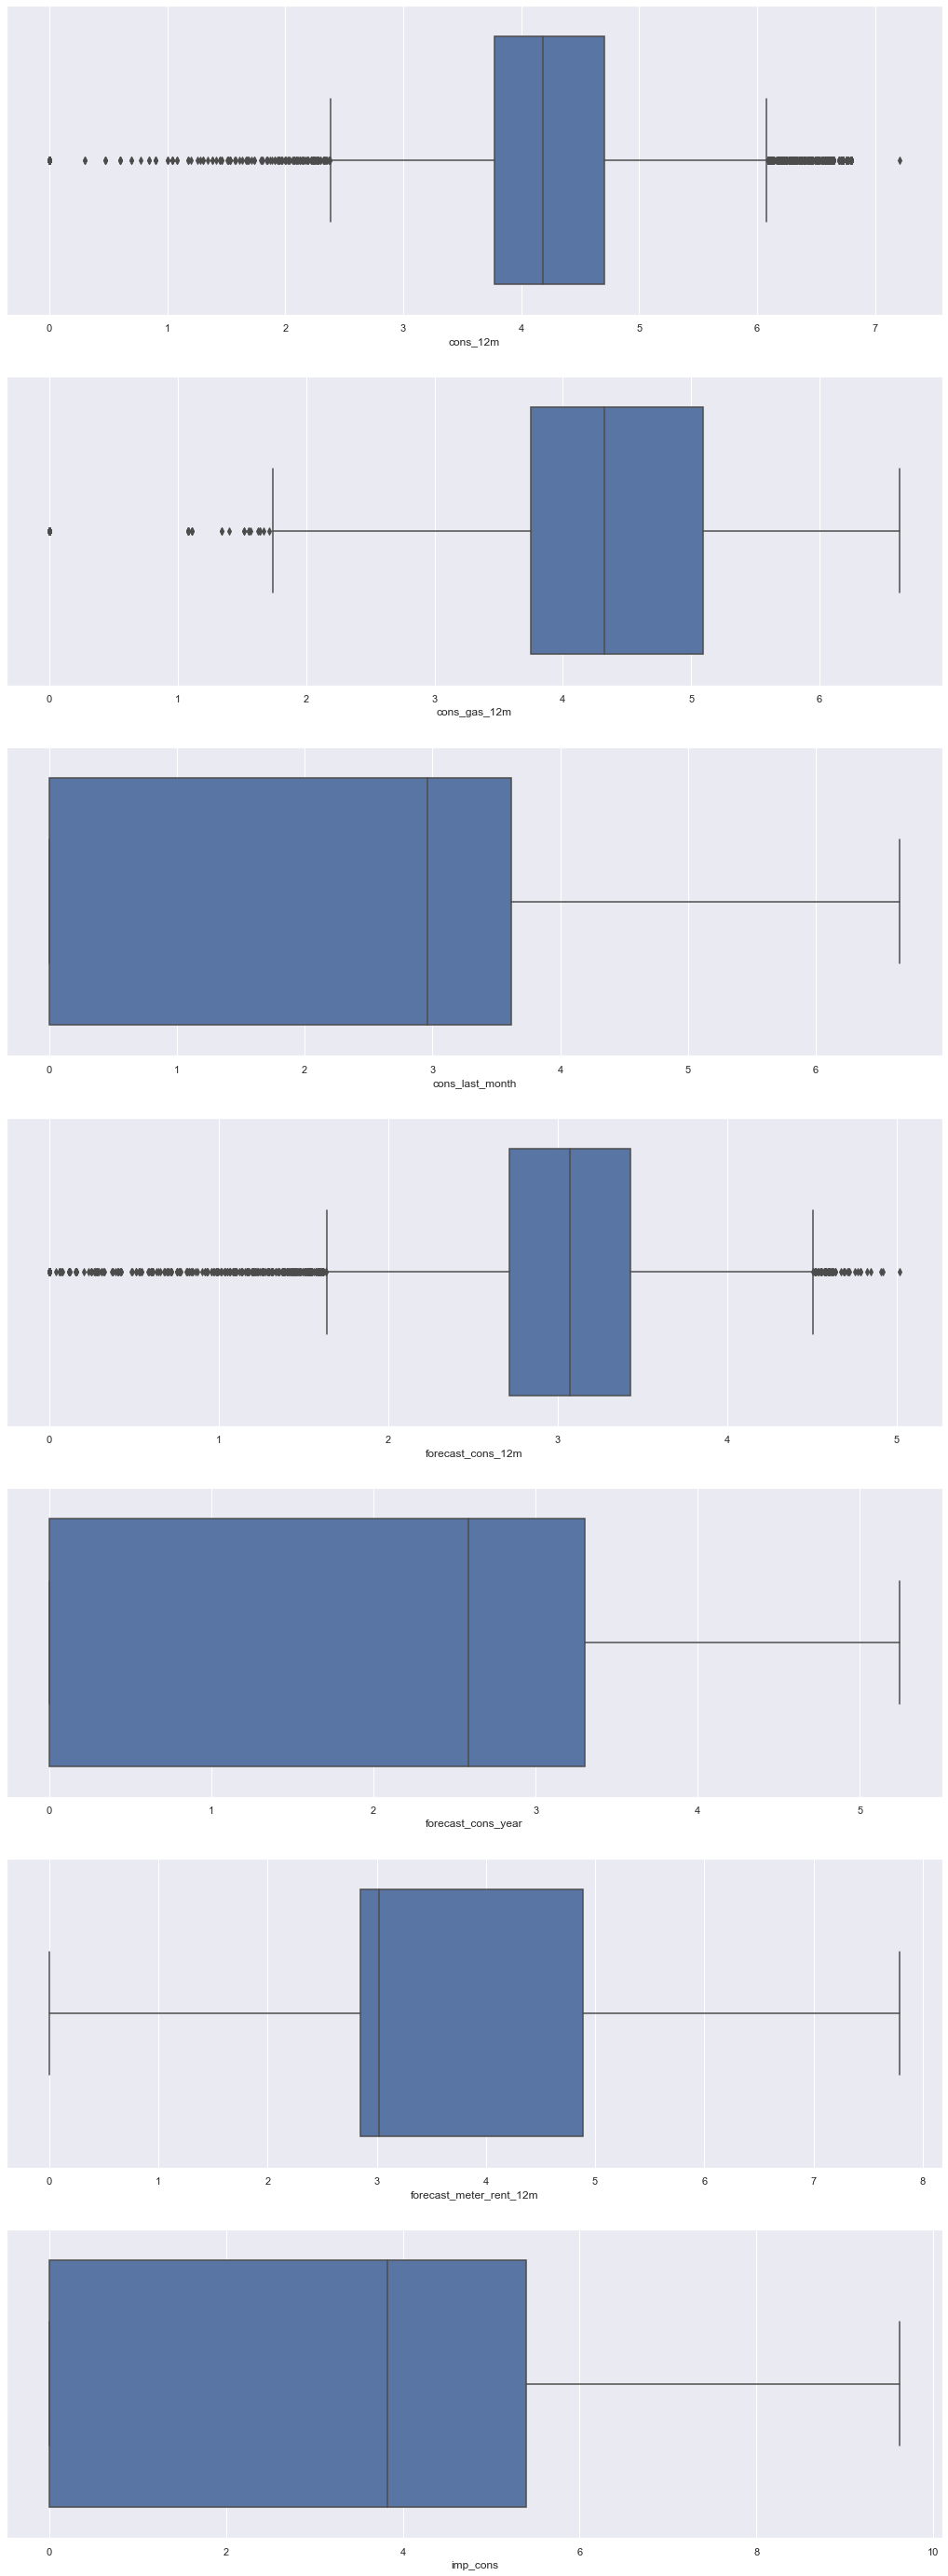

In [139]:
fig , axs = plt.subplots(nrows=7,figsize=(18,50))
sns.boxplot((train["cons_12m"].dropna()),ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()),ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()),ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()),ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()),ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()),ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()),ax=axs[6])
plt.show()

In [140]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,16096.000000,16069.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,3.568108,0.135901,0.052951,43.533496,0.184145,3.004921,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.329958,58.929858,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.160969,1.357130,0.026252,0.048617,5.212252,0.387615,2.683737,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796,1.749248,20.125024,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,0.000000,0.000000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,16.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,2.846652,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,3.017494,0.142881,0.086163,44.311378,0.000000,3.827771,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,4.886375,0.146348,0.098837,44.311378,0.000000,5.390623,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,7.788498,0.273963,0.195975,59.444710,1.000000,9.618721,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,16.000000,185.000000,17.000000,185.000000,30.000000,1.000000,1.000000,1.000000,1.00

In [141]:
# by boxplot we can conclude that there is still some outliers are present deal with them later
#std deviation changes

In [142]:
# calculating correlation variables
correlation = features.corr()

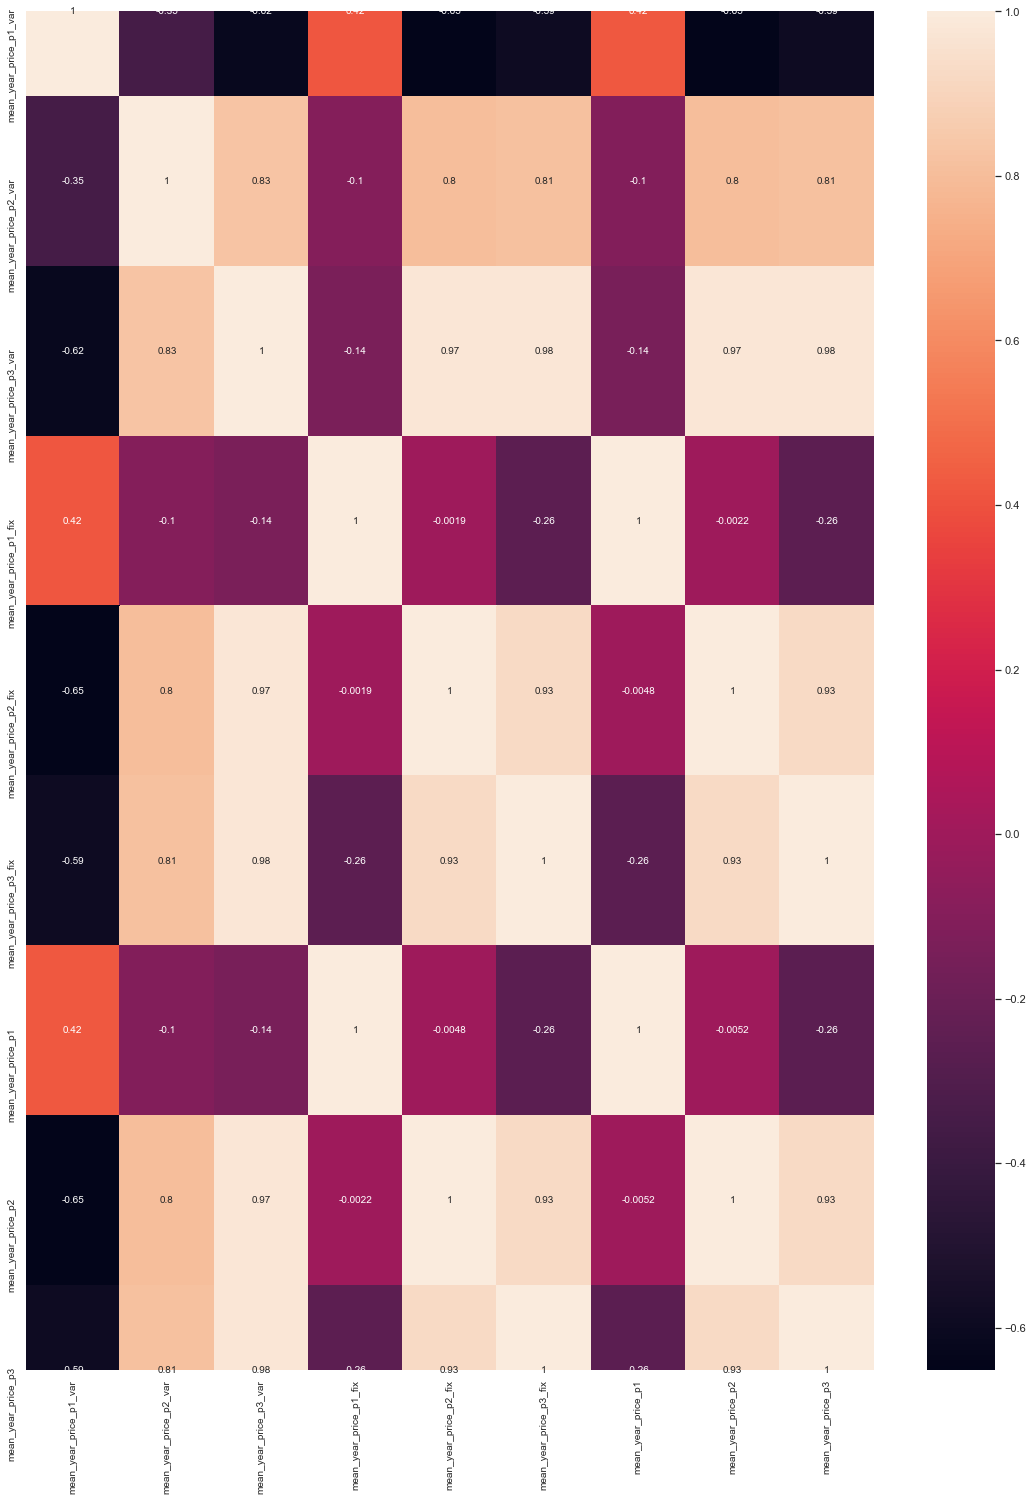

In [143]:
#plotting correlation
plt.figure(figsize=(19,25))
sns.heatmap(correlation,xticklabels=correlation.columns.values,
           yticklabels= correlation.columns.values,annot=True,annot_kws={"size":10})
#axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [144]:
# calculating correlation of varialbles 

In [145]:
correlation = train.corr()

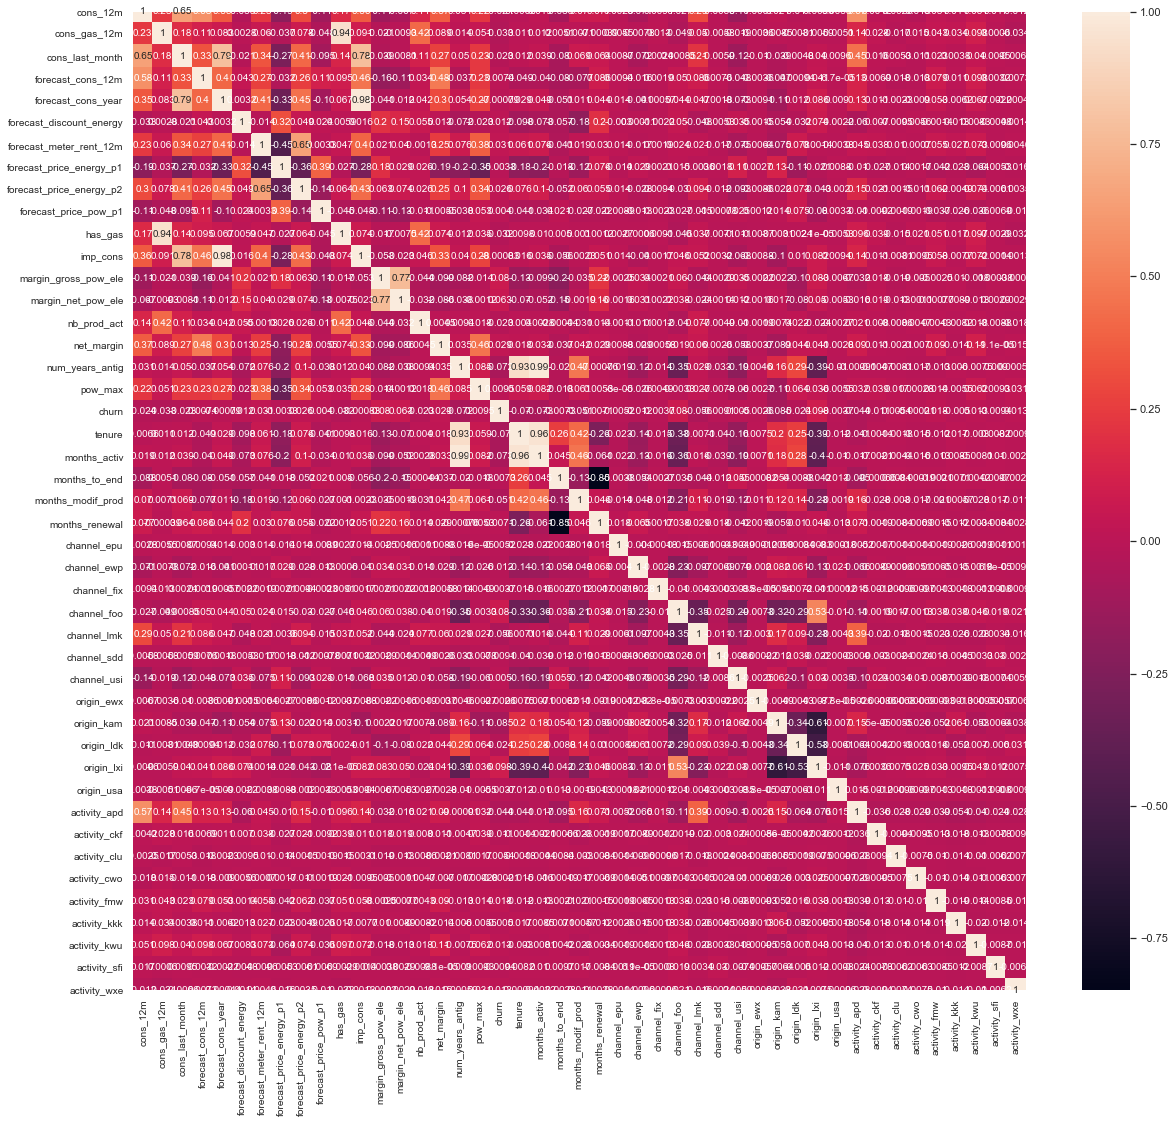

In [146]:
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels = correlation.columns.values,
           yticklabels = correlation.columns.values,annot=True,annot_kws={"size":10})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [147]:
# removing variables with high corelation
train.drop(columns = ["num_years_antig","forecast_cons_year"],inplace = True )

In [148]:
# Removing Outliers

In [149]:
#using z_score to remove outliers

In [150]:
def replace_outliers_z_score(dataframe, column , Z = 3):
    from scipy.stats import zscore
    df = dataframe.copy(deep=True)
    df.dropna(inplace = True, subset = [column])
    # calculating mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
    # Replacing with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z)|(dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < Z)| (dataframe["zscore"] > Z),column] = mean_
    print("Replaced : ", no_outliers," outliers in ", column)
    return(dataframe.drop(columns= "zscore"))

In [151]:
for c in features.columns:
    if c != "id":
        features = replace_outliers_z_score(features,c)

Replaced :  276  outliers in  mean_year_price_p1_var
Replaced :  0  outliers in  mean_year_price_p2_var
Replaced :  0  outliers in  mean_year_price_p3_var
Replaced :  120  outliers in  mean_year_price_p1_fix
Replaced :  0  outliers in  mean_year_price_p2_fix
Replaced :  0  outliers in  mean_year_price_p3_fix
Replaced :  122  outliers in  mean_year_price_p1
Replaced :  0  outliers in  mean_year_price_p2
Replaced :  0  outliers in  mean_year_price_p3


In [152]:
features.reset_index(drop=True,inplace= True)

In [153]:
def _find_outliers_iqr(dataframe,column):
    col = sorted(dataframe[column])
    q1 , q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    results = {"iqr " : iqr, "lower_bound" : lower_bound ,"upper_bound":upper_bound}
    return(results)


In [154]:
def remove_outliers_iqr(dataframe,column):
    outliers = _find_outliers_iqr(dataframe,column)
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
                       (dataframe[column] > outliers["upper_bound"])].shape
    dataframe = dataframe[(dataframe[column] < outliers["lower_bound"]) &
                         (dataframe[column] > outliers["upper_bound"])]
    print("Removed :", removed[0], "outliers")
    return dataframe

In [155]:
def remove_ouliers_z_score(dataframe,column,Z=3):
    from scipy.stats import zscore
    dataframe["zscore"] = zscore(dataframe[column])
    removed = dataframe[(dataframe["zscore"] < -Z) |
                       (dataframe["zscore"] > Z)].shape
    dataframe = dataframe[(dataframe["zscore"] < -Z) &
                         (dataframe["zscore"] > Z)]
    print("Removed :" , removed[0] , "outliers of" , column)
    return(dataframe.drop(columns = "zscore"))

In [163]:
def replace_ouliers_z_score(dataframe,column,Z=3):
    from scipy.stats import zscore
    df = dataframe.copy(deep = True)
    df.dropna(inplace= True,subset=[column])
    # calculating mean withoput outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
    #replacing with mean values
    no_outliers = dataframe[column].isnull().sum()
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
    #print message
    print("Replaced :", no_outliers,"outliers in ",column)
    return(dataframe.drop(columns="zscore"))

    

In [166]:

train = replace_ouliers_z_score(train,"cons_12m")
train = replace_ouliers_z_score(train,"cons_gas_12m")
train = replace_ouliers_z_score(train,"cons_last_month")
train = replace_ouliers_z_score(train,"forecast_cons_12m")
train = replace_ouliers_z_score(train,"forecast_discount_energy")
train = replace_ouliers_z_score(train,"forecast_meter_rent_12m")
train = replace_ouliers_z_score(train,"forecast_price_energy_p1")
train = replace_ouliers_z_score(train,"forecast_price_energy_p2")
train = replace_ouliers_z_score(train,"forecast_price_pow_p1")
train = replace_ouliers_z_score(train,"imp_cons")
train = replace_ouliers_z_score(train,"margin_gross_pow_ele")
train = replace_ouliers_z_score(train,"margin_net_pow_ele")
train = replace_ouliers_z_score(train,"net_margin")
train = replace_ouliers_z_score(train,"pow_max")
train = replace_ouliers_z_score(train,"months_activ")
train = replace_ouliers_z_score(train,"months_modif_prod")
train = replace_ouliers_z_score(train,"months_renewal")


Replaced : 0 outliers in  cons_12m
Replaced : 0 outliers in  cons_gas_12m
Replaced : 0 outliers in  cons_last_month
Replaced : 0 outliers in  forecast_cons_12m
Replaced : 0 outliers in  forecast_discount_energy
Replaced : 0 outliers in  forecast_meter_rent_12m
Replaced : 0 outliers in  forecast_price_energy_p1
Replaced : 0 outliers in  forecast_price_energy_p2
Replaced : 126 outliers in  forecast_price_pow_p1
Replaced : 27 outliers in  imp_cons
Replaced : 13 outliers in  margin_gross_pow_ele
Replaced : 13 outliers in  margin_net_pow_ele
Replaced : 15 outliers in  net_margin
Replaced : 3 outliers in  pow_max
Replaced : 0 outliers in  months_activ
Replaced : 0 outliers in  months_modif_prod
Replaced : 0 outliers in  months_renewal


In [167]:
train.reset_index(drop=True,inplace = True)

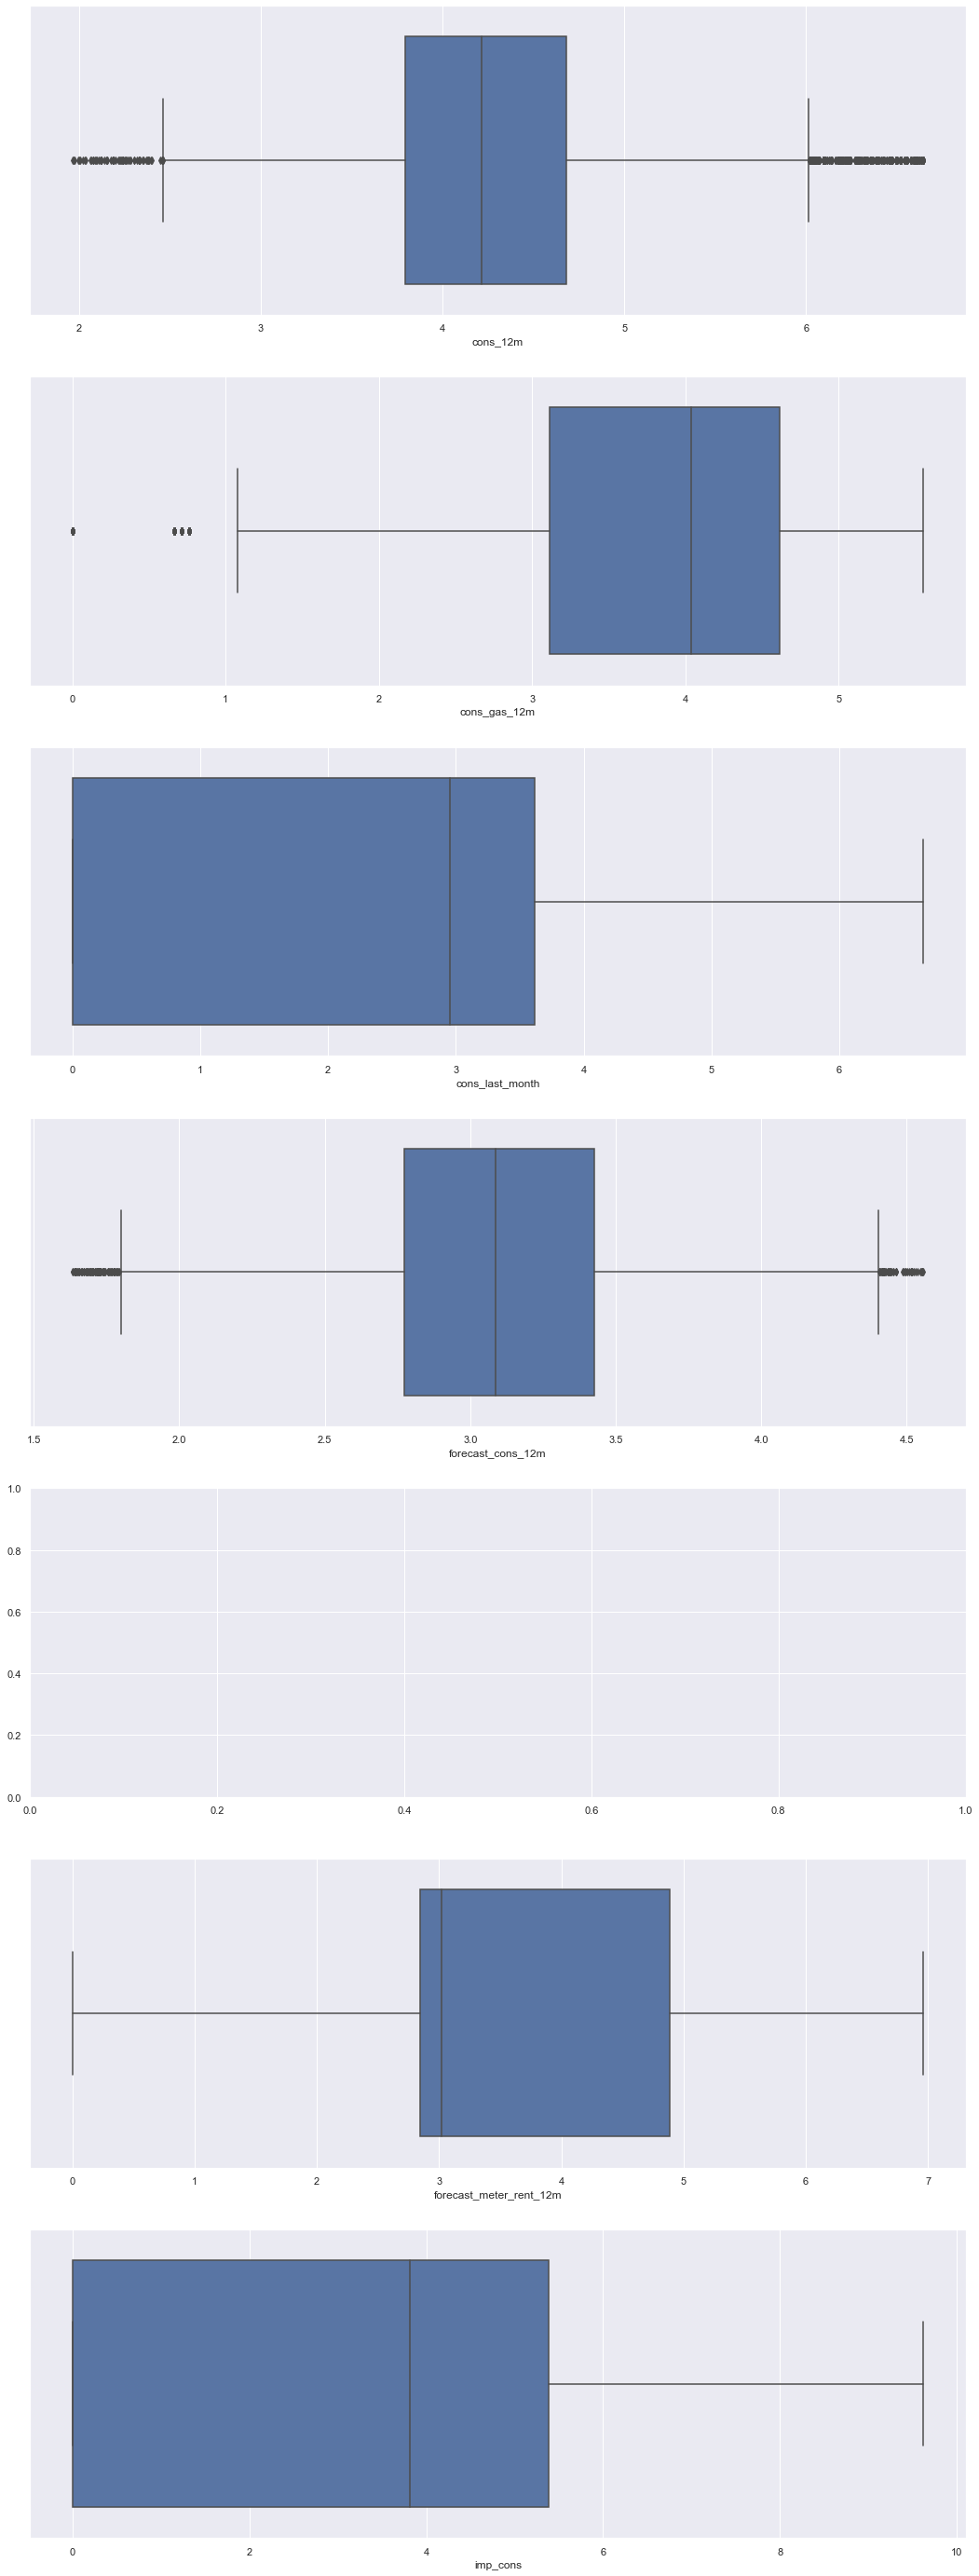

In [171]:
fig,axs = plt.subplots(nrows=7,figsize=(18,50))
#plotting boxplots
sns.boxplot((train["cons_12m"].dropna()),ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()),ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()),ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()),ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()),ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()),ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()),ax=axs[6])
plt.show()